In [105]:
# Import libs
import numpy as np
import matplotlib.pyplot as plt
!pip3 install seaborn
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

sns.set_theme(style = 'darkgrid')
plt.rcParams['figure.figsize'] = (20,15)

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [106]:
# read the data from the /content/card_transdata.csv
df = pd.read_csv('/Users/akilaliyanage/Downloads/archive (5)/AIDS_Classification.csv')
print(df.head(10))
print(df.columns.tolist())


   time  trt  age     wtkg  hemo  homo  drugs  karnof  oprior  z30  ...  str2  \
0   948    2   48  89.8128     0     0      0     100       0    0  ...     0   
1  1002    3   61  49.4424     0     0      0      90       0    1  ...     1   
2   961    3   45  88.4520     0     1      1      90       0    1  ...     1   
3  1166    3   47  85.2768     0     1      0     100       0    1  ...     1   
4  1090    0   43  66.6792     0     1      0     100       0    1  ...     1   
5  1181    1   46  88.9056     0     1      1     100       0    1  ...     1   
6   794    0   31  73.0296     0     1      0     100       0    1  ...     1   
7   957    0   41  66.2256     0     1      1     100       0    1  ...     1   
8   198    3   40  82.5552     0     1      0      90       0    1  ...     1   
9   188    0   35  78.0192     0     1      0     100       0    1  ...     1   

   strat  symptom  treat  offtrt  cd40  cd420  cd80  cd820  infected  
0      1        0      1       0   42

In [107]:
y = df['infected']
X = df.drop(columns=['infected'])
X.describe().transpose()

count        mean         std    min       25%       50%        75%  \
time     2139.0  879.098177  292.274324   14.0  727.0000  997.0000  1091.0000   
trt      2139.0    1.520804    1.127890    0.0    1.0000    2.0000     3.0000   
age      2139.0   35.248247    8.709026   12.0   29.0000   34.0000    40.0000   
wtkg     2139.0   75.125311   13.263164   31.0   66.6792   74.3904    82.5552   
hemo     2139.0    0.084151    0.277680    0.0    0.0000    0.0000     0.0000   
homo     2139.0    0.661057    0.473461    0.0    0.0000    1.0000     1.0000   
drugs    2139.0    0.131370    0.337883    0.0    0.0000    0.0000     0.0000   
karnof   2139.0   95.446470    5.900985   70.0   90.0000  100.0000   100.0000   
oprior   2139.0    0.021973    0.146629    0.0    0.0000    0.0000     0.0000   
z30      2139.0    0.550257    0.497584    0.0    0.0000    1.0000     1.0000   
preanti  2139.0  379.175783  468.657526    0.0    0.0000  142.0000   739.5000   
race     2139.0    0.288453    0.453149    0.0    0.0000    0.0000     1.0000   
gender   2139.0    0.827957    0.377506    0.0    1.0000    1.0000     1.0000   
str2     2139.0    0.585788    0.492701    0.0    0.0000    1.0000     1.0000   
strat    2139.0    1.979897    0.899053    1.0    1.0000    2.0000     3.0000   
symptom  2139.0    0.172978    0.378317    0.0    0.0000    0.0000     0.0000   
treat    2139.0    0.751286    0.432369    0.0    1.0000    1.0000     1.0000   
offtrt   2139.0    0.362786    0.480916    0.0    0.0000    0.0000     1.0000   
cd40     2139.0  350.501169  118.573863    0.0  263.5000  340.0000   423.0000   
cd420    2139.0  371.307153  144.634909   49.0  269.0000  353.0000   460.0000   
cd80     2139.0  986.627396  480.197750   40.0  654.0000  893.0000  1207.0000   
cd820    2139.0  935.369799  444.976051  124.0  631.5000  865.0000  1146.5000   

                max  
time     1231.00000  
trt         3.00000  
age        70.00000  
wtkg      159.93936  
hemo        1.00000  
homo        1.00000  
drugs       1.00000  
karnof    100.00000  
oprior      1.00000  
z30         1.00000  
preanti  2851.00000  
race        1.00000  
gender      1.00000  
str2        1.00000  
strat       3.00000  
symptom     1.00000  
treat       1.00000  
offtrt      1.00000  
cd40     1199.00000  
cd420    1119.00000  
cd80     5011.00000  
cd820    6035.00000

<BarContainer object of 2 artists>

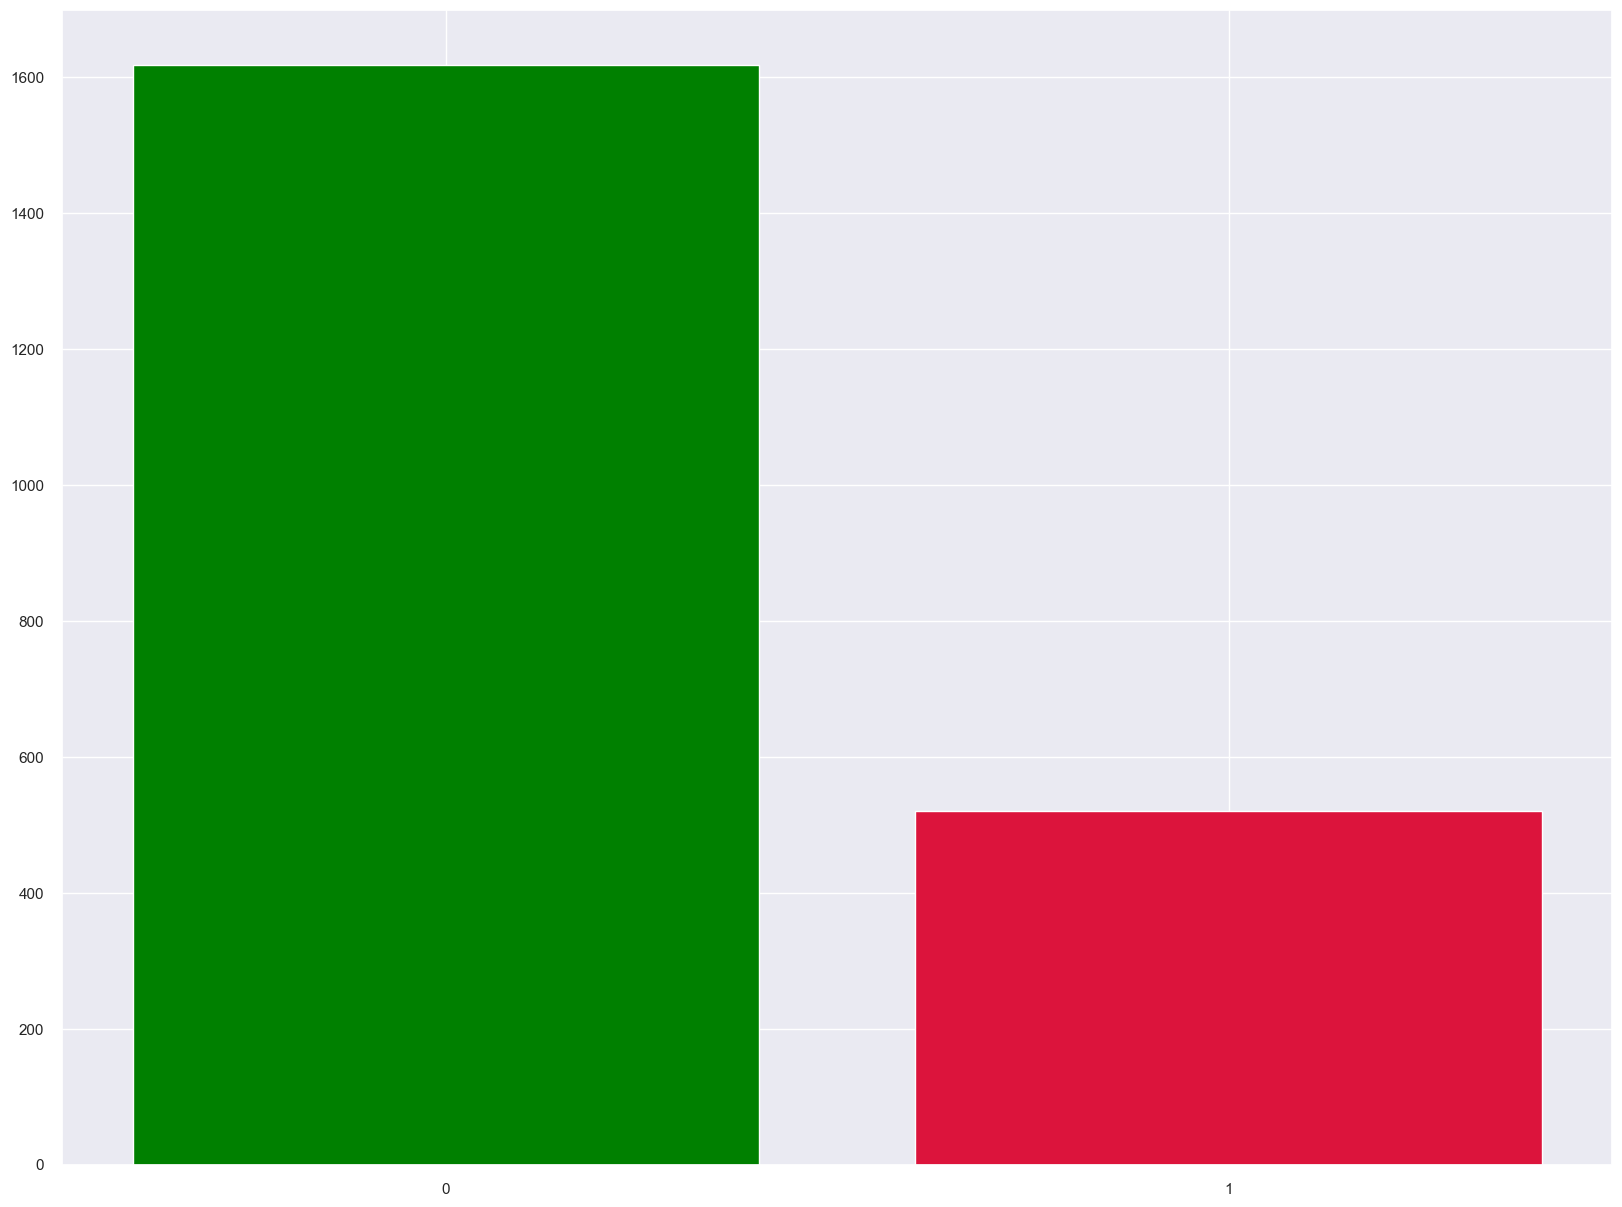

In [108]:
ratio= df['infected'].value_counts()
plt.bar(ratio.index.astype(str), ratio.values, color=["green", "crimson"])

In [109]:
# starting PCA
# 1. transforming the data set

# Xs = StandardScaler().fit_transform(X)
# Xcols = X.columns
# X = pd.DataFrame(Xs)
# X.columns = Xcols

# df.describe().transpose()

# X_st = StandardScaler().fit_transform(X)
# df = pd.DataFrame(X_st)
# df.columns = X.columns


Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)


time       trt       age      wtkg      hemo      homo     drugs  \
0  0.235799  0.424960  1.464542  1.107649 -0.303123 -1.396547 -0.388893   
1  0.420600  1.311779  2.957595 -1.936862 -0.303123 -1.396547 -0.388893   
2  0.280288  1.311779  1.119991  1.005025 -0.303123  0.716052  2.571400   
3  0.981848  1.311779  1.349692  0.765569 -0.303123  0.716052 -0.388893   
4  0.721757 -1.348678  0.890291 -0.636959 -0.303123  0.716052 -0.388893   
5  1.033181 -0.461859  1.234842  1.039233 -0.303123  0.716052  2.571400   
6 -0.291227 -1.348678 -0.487912 -0.158047 -0.303123  0.716052 -0.388893   
7  0.266599 -1.348678  0.660590 -0.671167 -0.303123  0.716052  2.571400   
8 -2.330884  1.311779  0.545740  0.560321 -0.303123  0.716052 -0.388893   
9 -2.365106 -1.348678 -0.028511  0.218241 -0.303123  0.716052 -0.388893   

     karnof    oprior       z30  ...    gender      str2     strat   symptom  \
0  0.771836 -0.149888 -1.106116  ... -2.193741 -1.189210 -1.090177 -0.457338   
1 -0.923192 -0.149888  0.904064  ... -2.193741  0.840894  1.134907 -0.457338   
2 -0.923192 -0.149888  0.904064  ...  0.455842  0.840894  1.134907 -0.457338   
3  0.771836 -0.149888  0.904064  ...  0.455842  0.840894  1.134907 -0.457338   
4  0.771836 -0.149888  0.904064  ...  0.455842  0.840894  1.134907 -0.457338   
5  0.771836 -0.149888  0.904064  ...  0.455842  0.840894  1.134907 -0.457338   
6  0.771836 -0.149888  0.904064  ...  0.455842  0.840894  1.134907 -0.457338   
7  0.771836 -0.149888  0.904064  ...  0.455842  0.840894  1.134907 -0.457338   
8 -0.923192 -0.149888  0.904064  ...  0.455842  0.840894  1.134907  2.186568   
9  0.771836 -0.149888  0.904064  ...  0.455842  0.840894  1.134907 -0.457338   

      treat    offtrt      cd40     cd420      cd80     cd820  
0  0.575371 -0.754541  0.603131  0.730927 -0.876151 -1.374260  
1  0.575371 -0.754541 -1.590108 -1.060207 -1.238586 -0.834779  
2  0.575371  1.325309 -0.206680 -0.672935  2.242044  2.152597  
3  0.575371 -0.754541 -0.535666  0.156934  1.256802  0.068852  
4 -1.738009 -0.754541  1.294845 -0.126605 -0.242930 -0.344750  
5  0.575371 -0.754541 -0.974314 -0.223423 -0.263760  0.280148  
6 -1.738009 -0.754541 -0.898394 -1.011798 -0.580370 -0.531321  
7 -1.738009 -0.754541  0.425985 -0.036702 -0.203354 -0.484116  
8  0.575371  1.325309 -1.151460 -1.827836 -0.697016 -1.808093  
9 -1.738009  1.325309 -1.092411 -1.654947 -1.594773 -0.396451  

[10 rows x 22 columns]

In [110]:
X.describe().transpose()

count          mean       std       min       25%       50%  \
time     2139.0  1.229083e-16  1.000234 -2.960576 -0.520517  0.403489   
trt      2139.0 -9.467259e-17  1.000234 -1.348678 -0.461859  0.424960   
age      2139.0  2.790350e-16  1.000234 -2.670067 -0.717613 -0.143361   
wtkg     2139.0 -3.288627e-16  1.000234 -3.327685 -0.636959 -0.055423   
hemo     2139.0  2.657476e-17  1.000234 -0.303123 -0.303123 -0.303123   
homo     2139.0  9.301167e-17  1.000234 -1.396547 -1.396547  0.716052   
drugs    2139.0  7.972429e-17  1.000234 -0.388893 -0.388893 -0.388893   
karnof   2139.0  6.577254e-16  1.000234 -4.313250 -0.923192  0.771836   
oprior   2139.0 -6.643691e-18  1.000234 -0.149888 -0.149888 -0.149888   
z30      2139.0  7.308060e-17  1.000234 -1.106116 -1.106116  0.904064   
preanti  2139.0 -5.979322e-17  1.000234 -0.809257 -0.809257 -0.506193   
race     2139.0  1.361957e-16  1.000234 -0.636701 -0.636701 -0.636701   
gender   2139.0 -7.972429e-17  1.000234 -2.193741  0.455842  0.455842   
str2     2139.0 -8.304614e-17  1.000234 -1.189210 -1.189210  0.840894   
strat    2139.0  2.325292e-17  1.000234 -1.090177 -1.090177  0.022365   
symptom  2139.0  3.321845e-17  1.000234 -0.457338 -0.457338 -0.457338   
treat    2139.0  1.660923e-18  1.000234 -1.738009  0.575371  0.575371   
offtrt   2139.0 -5.439522e-17  1.000234 -0.754541 -0.754541 -0.754541   
cd40     2139.0 -4.650584e-17  1.000234 -2.956664 -0.733901 -0.088583   
cd420    2139.0  1.710750e-16  1.000234 -2.228940 -0.707513 -0.126605   
cd80     2139.0  9.135075e-17  1.000234 -1.971789 -0.692850 -0.195022   
cd820    2139.0 -1.195864e-16  1.000234 -1.823827 -0.683050 -0.158180   

              75%        max  
time     0.725180   1.204294  
trt      1.311779   1.311779  
age      0.545740   3.991248  
wtkg     0.560321   6.396202  
hemo    -0.303123   3.298990  
homo     0.716052   0.716052  
drugs   -0.388893   2.571400  
karnof   0.771836   0.771836  
oprior  -0.149888   6.671629  
z30      0.904064   0.904064  
preanti  0.769023   5.275499  
race     1.570597   1.570597  
gender   0.455842   0.455842  
str2     0.840894   0.840894  
strat    1.134907   1.134907  
symptom -0.457338   2.186568  
treat    0.575371   0.575371  
offtrt   1.325309   1.325309  
cd40     0.611566   7.157541  
cd420    0.613362   5.170727  
cd80     0.459028   8.382617  
cd820    0.474586  11.463140

In [111]:
observations = list(df.index)
print(observations)
variables = list(df.columns)
print(variables)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

# **Data Visualisation**

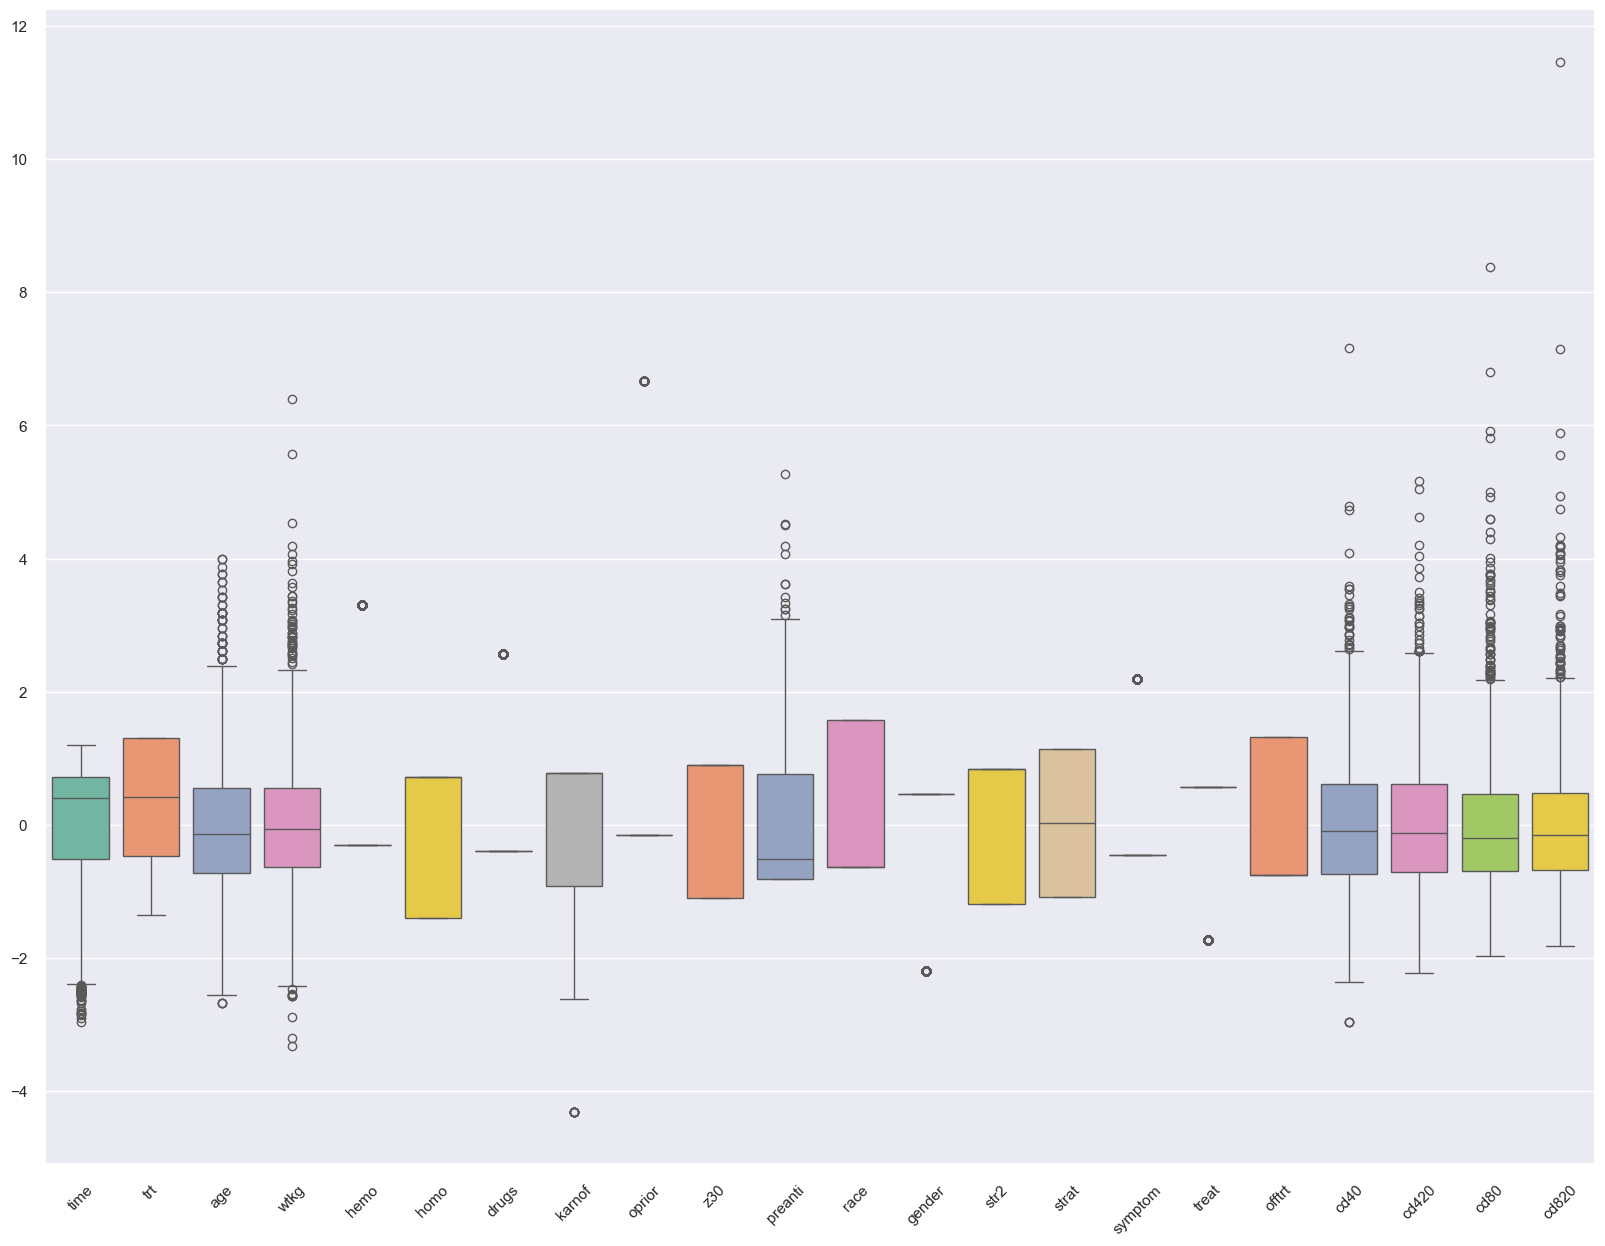

In [112]:
# Box & Whisker Plots
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

[Text(0, 0, 'time'),
 Text(1, 0, 'trt'),
 Text(2, 0, 'age'),
 Text(3, 0, 'wtkg'),
 Text(4, 0, 'hemo'),
 Text(5, 0, 'homo'),
 Text(6, 0, 'drugs'),
 Text(7, 0, 'karnof'),
 Text(8, 0, 'oprior'),
 Text(9, 0, 'z30'),
 Text(10, 0, 'preanti'),
 Text(11, 0, 'race'),
 Text(12, 0, 'gender'),
 Text(13, 0, 'str2'),
 Text(14, 0, 'strat'),
 Text(15, 0, 'symptom'),
 Text(16, 0, 'treat'),
 Text(17, 0, 'offtrt'),
 Text(18, 0, 'cd40'),
 Text(19, 0, 'cd420'),
 Text(20, 0, 'cd80'),
 Text(21, 0, 'cd820')]

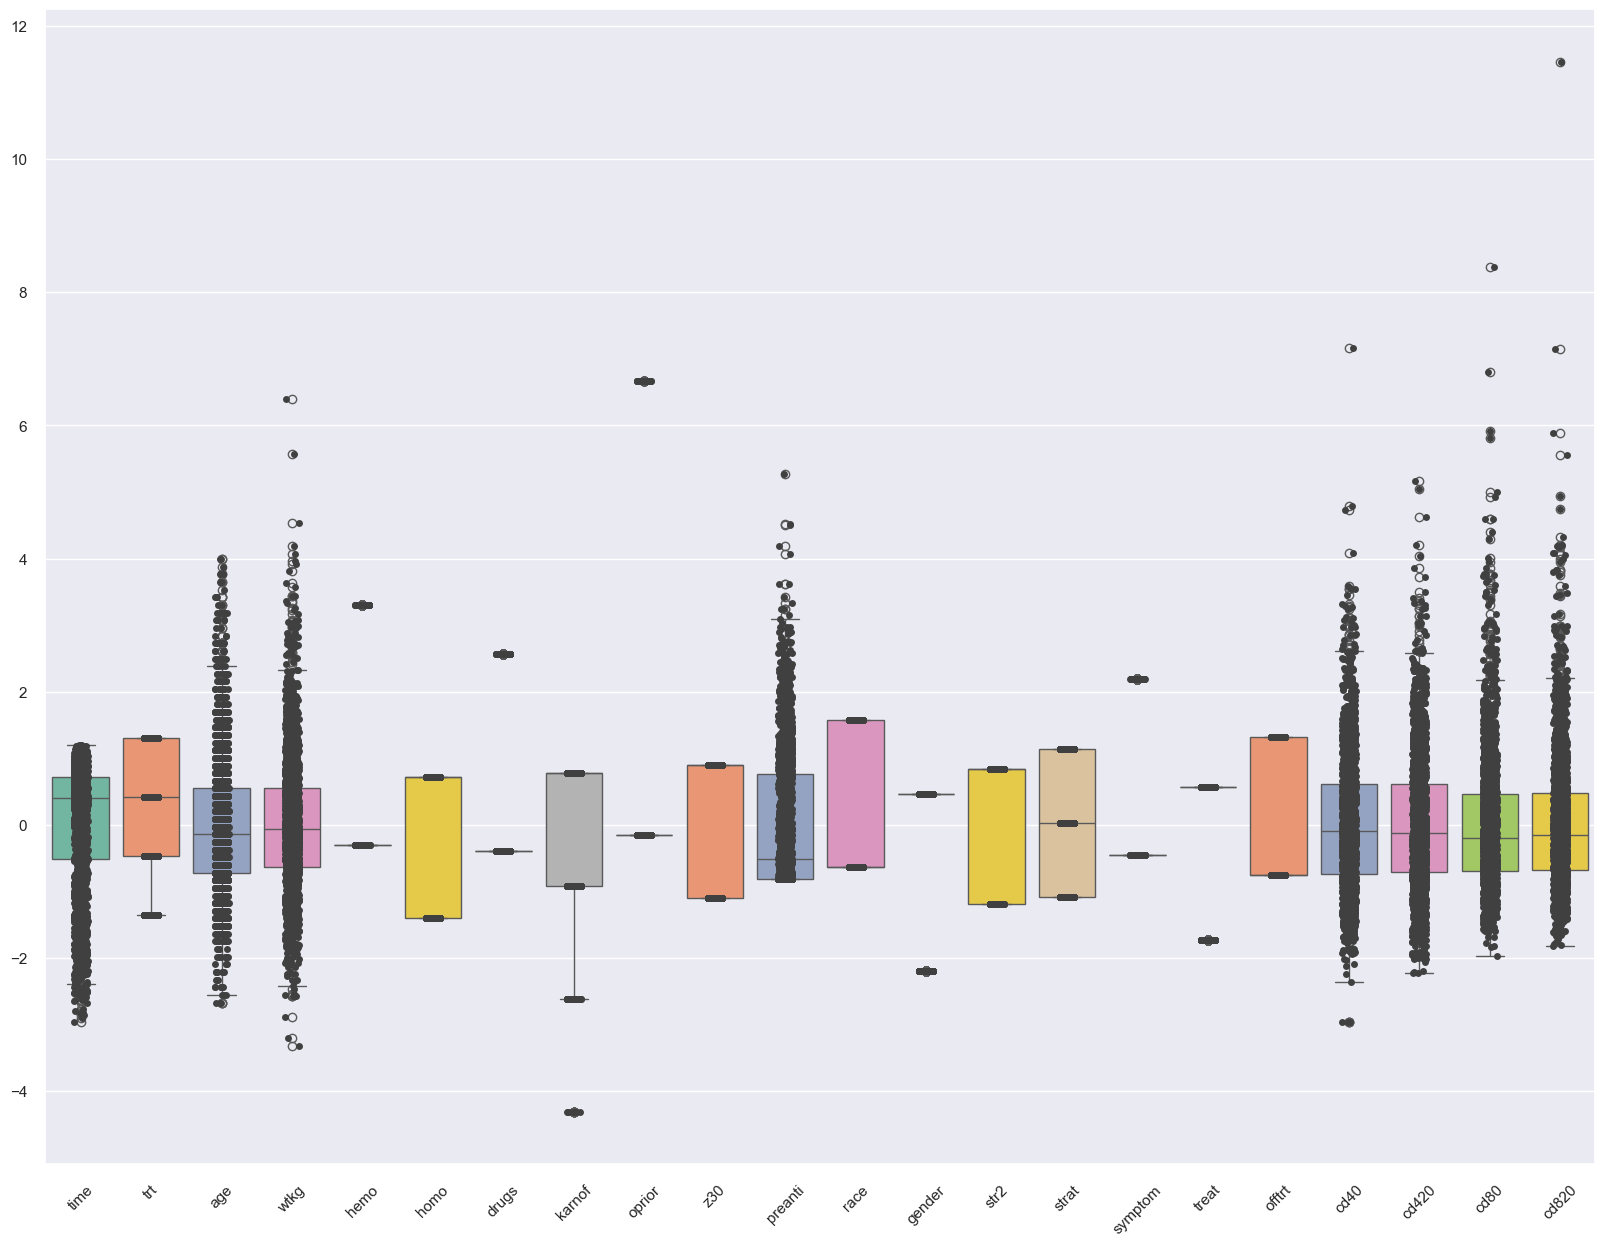

In [113]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

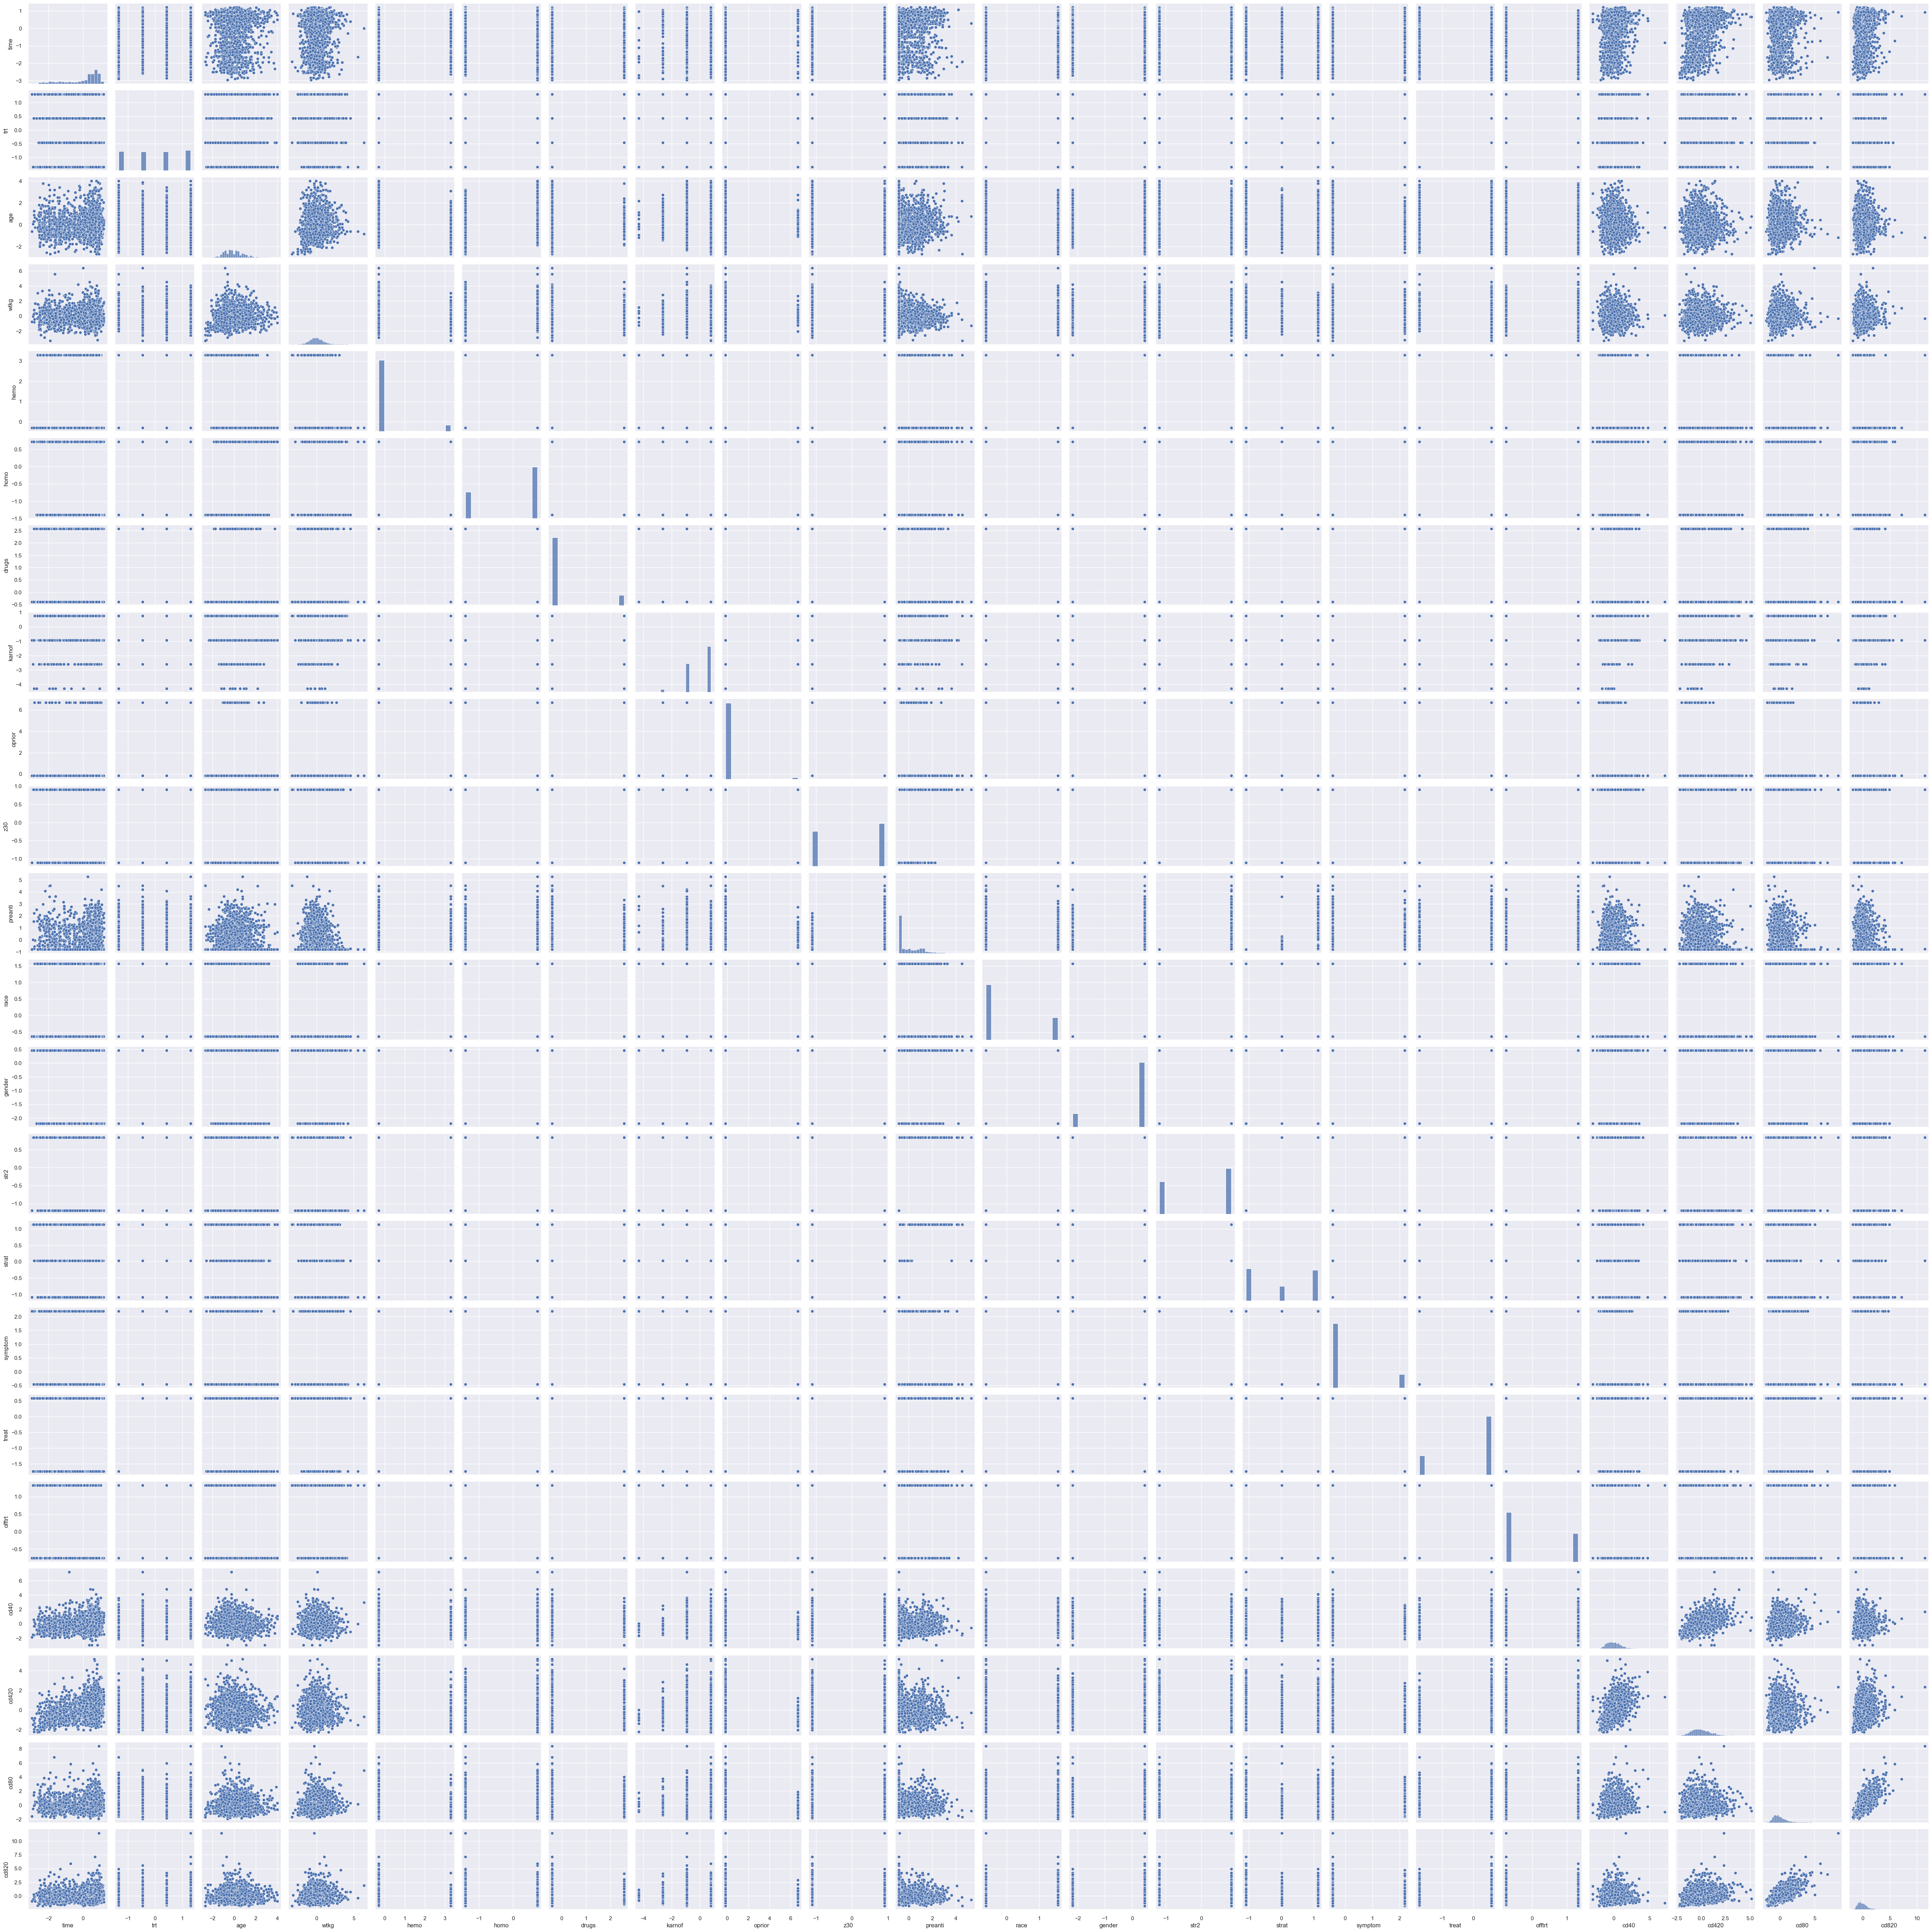

In [114]:
sns.pairplot(X)

[Text(0.5, 1, 'time'),
 Text(1.5, 1, 'trt'),
 Text(2.5, 1, 'age'),
 Text(3.5, 1, 'wtkg'),
 Text(4.5, 1, 'hemo'),
 Text(5.5, 1, 'homo'),
 Text(6.5, 1, 'drugs'),
 Text(7.5, 1, 'karnof'),
 Text(8.5, 1, 'oprior'),
 Text(9.5, 1, 'z30'),
 Text(10.5, 1, 'preanti'),
 Text(11.5, 1, 'race'),
 Text(12.5, 1, 'gender'),
 Text(13.5, 1, 'str2'),
 Text(14.5, 1, 'strat'),
 Text(15.5, 1, 'symptom'),
 Text(16.5, 1, 'treat'),
 Text(17.5, 1, 'offtrt'),
 Text(18.5, 1, 'cd40'),
 Text(19.5, 1, 'cd420'),
 Text(20.5, 1, 'cd80'),
 Text(21.5, 1, 'cd820')]

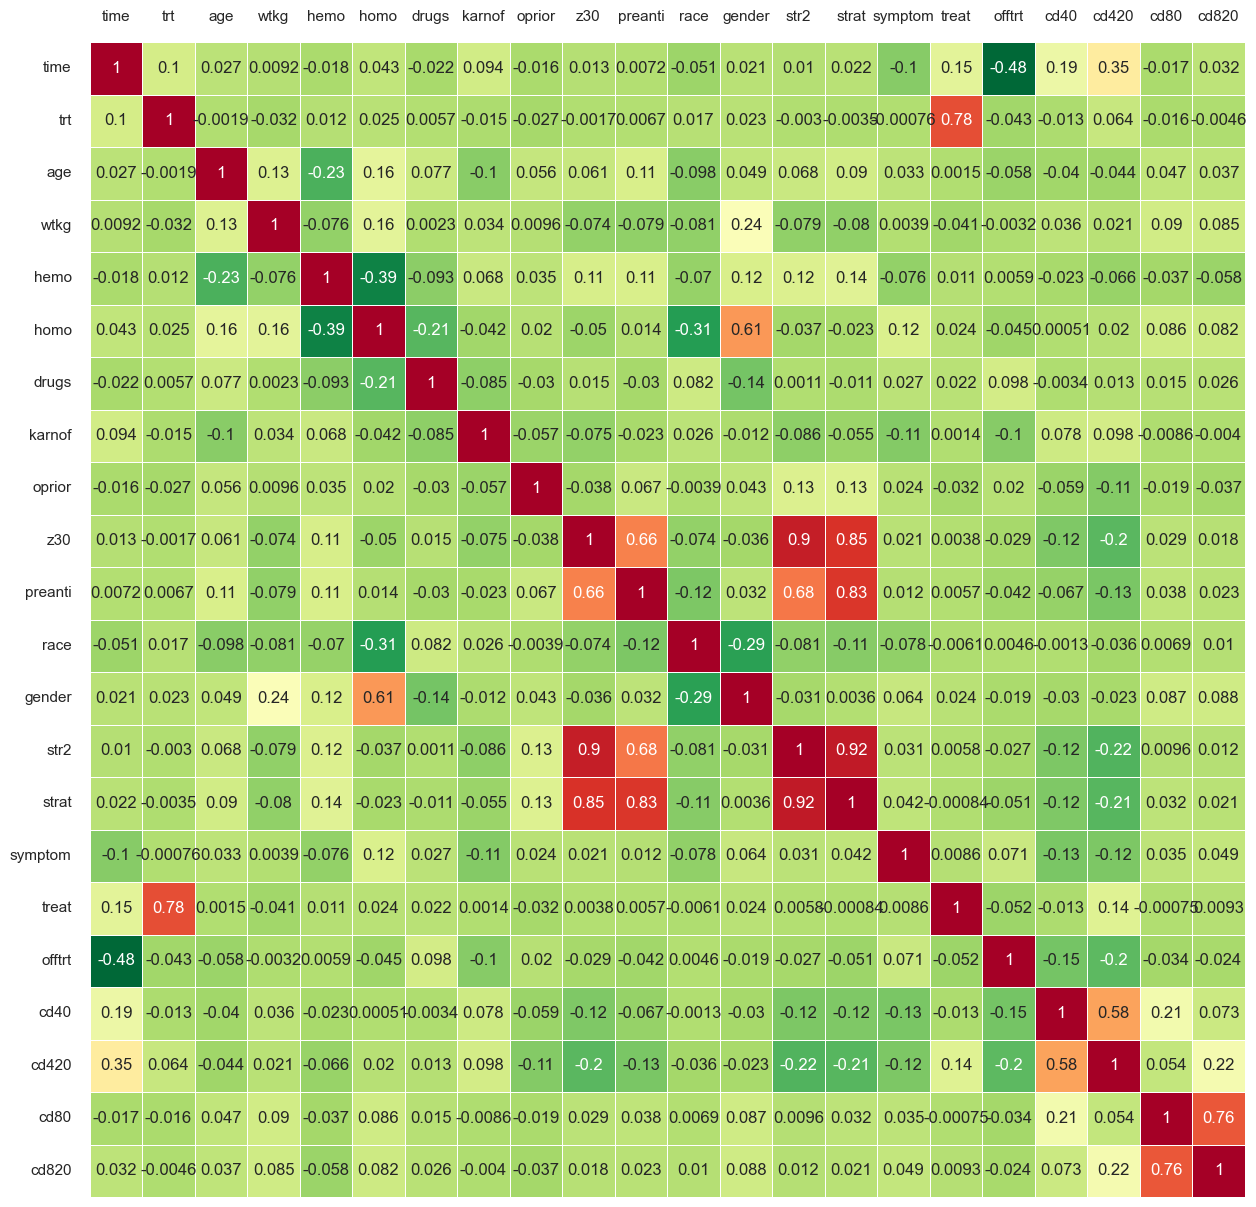

In [115]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)

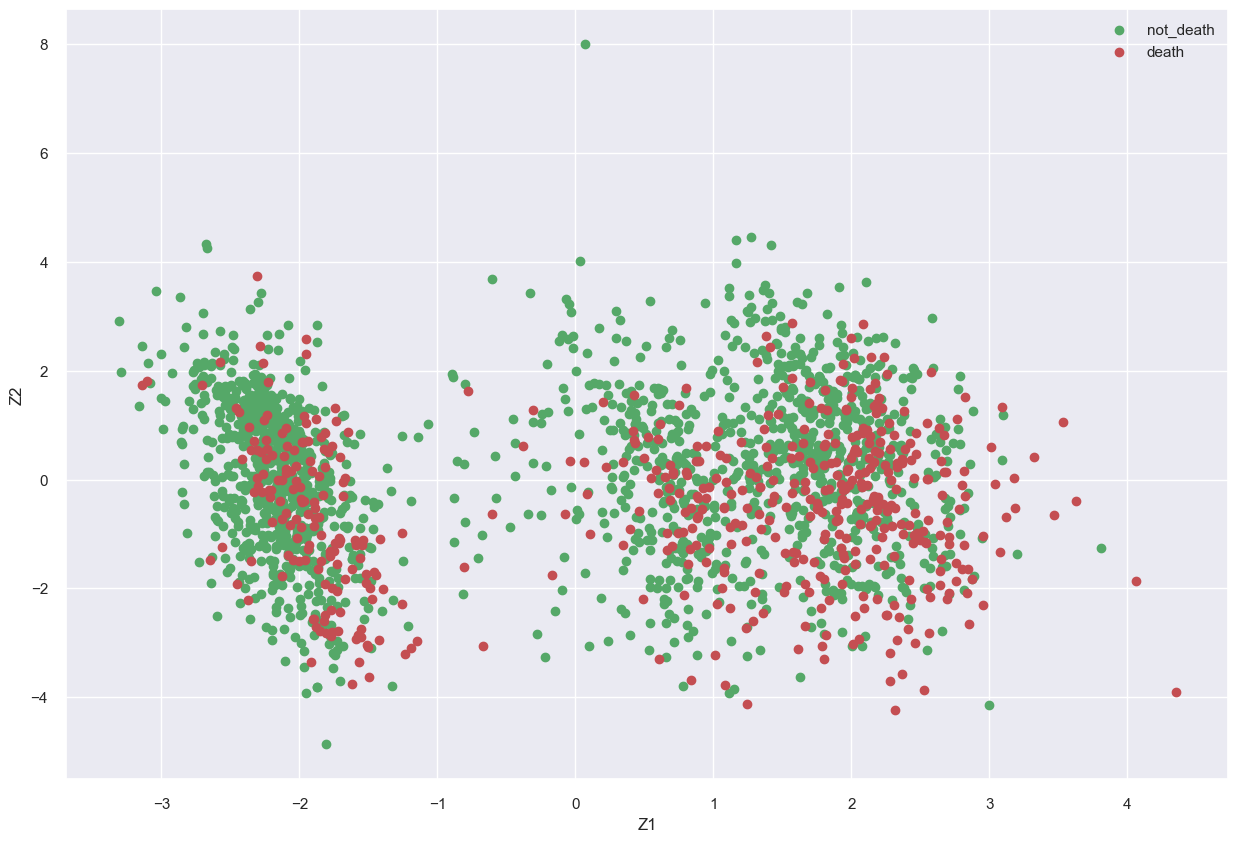

In [116]:
pca = PCA()
Z = pca.fit_transform(X)

idx_infected = np.where(y == 1)
idx_not_infected = np.where(y == 0)

plt.figure(figsize=(15, 10))
plt.scatter(Z[idx_not_infected, 0], Z[idx_not_infected, 1], c='g', label='not_death')
plt.scatter(Z[idx_infected, 0], Z[idx_infected, 1], c='r', label='death')
plt.legend()
plt.xlabel('Z1')
plt.ylabel('Z2')

plt.show()
plt.close()

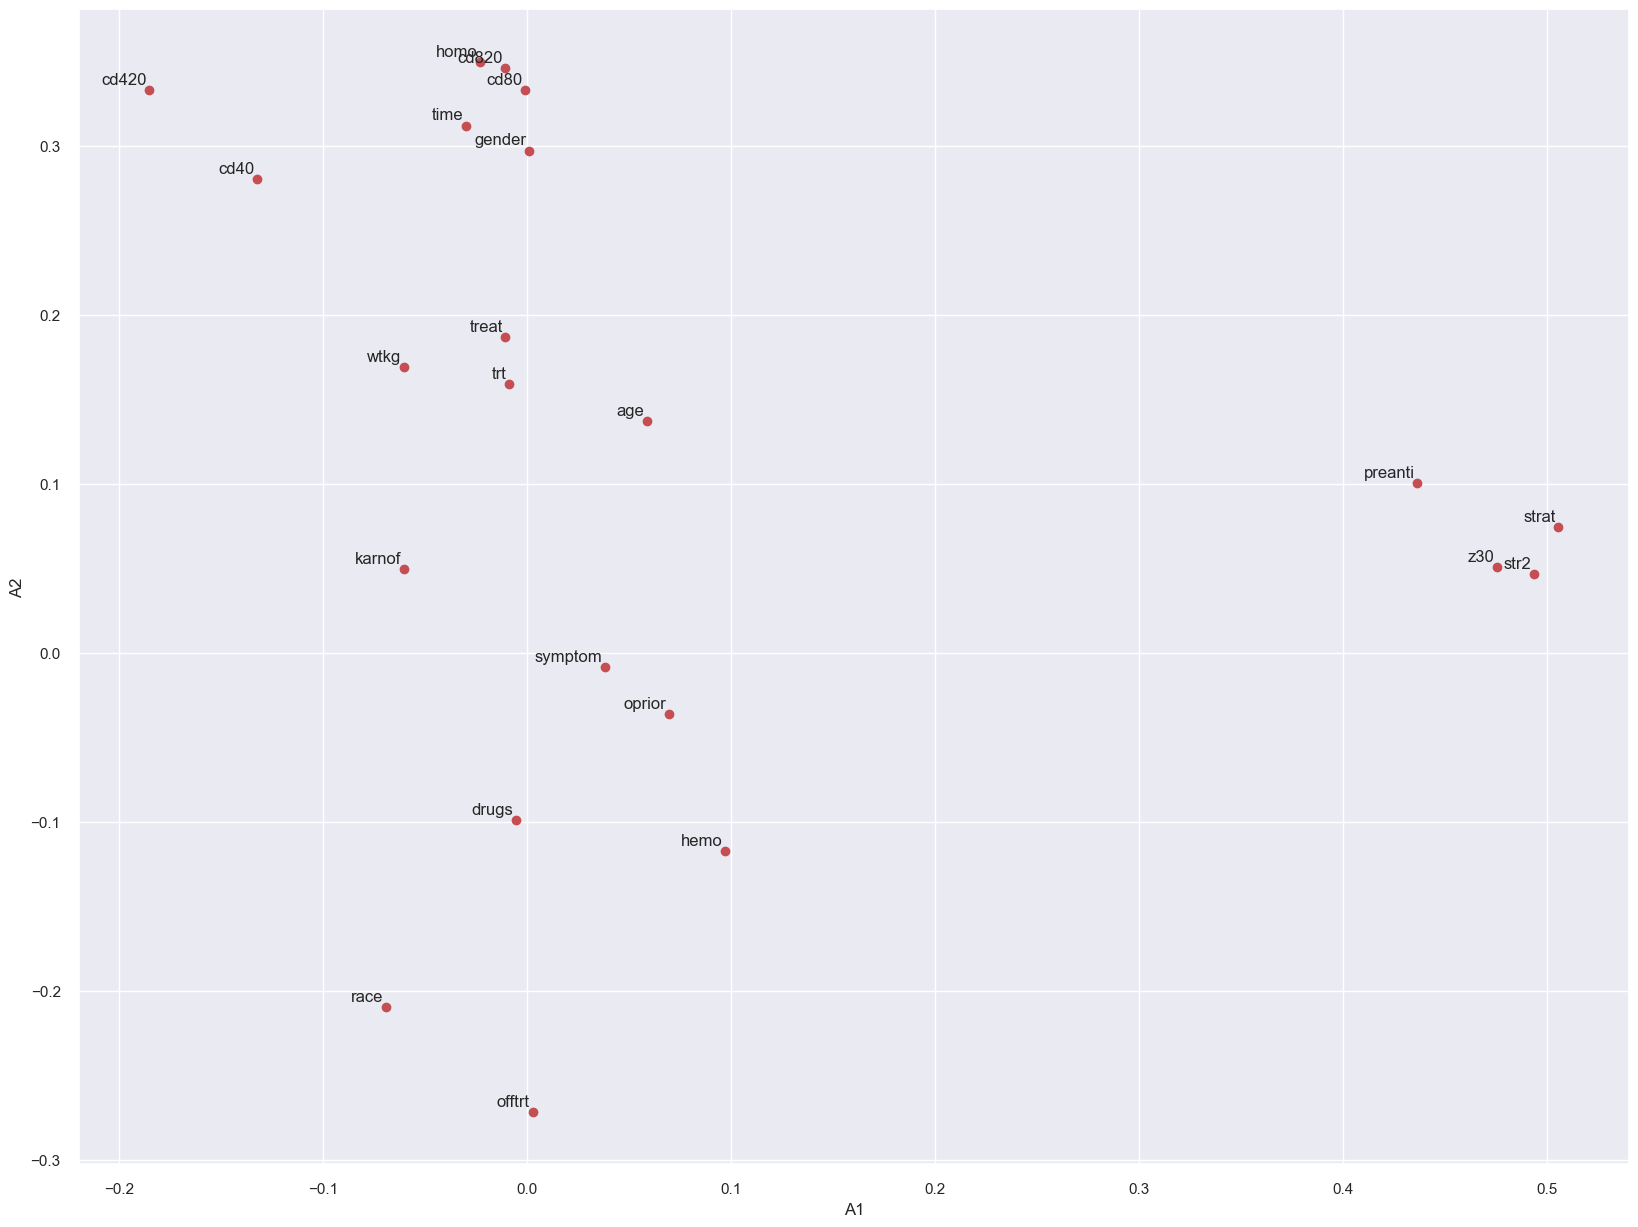

In [117]:
# defining eigenvectors and eigen values
# A = pca.components_.T
# plt.figure(figsize=(15, 10))
# plt.scatter(A[:, 0], A[: ,1], c='r')
# plt.xlabel('A1')
# plt.ylabel('A2')
# variables = Xcols
# for label, x, y in zip(variables, A[:, 0], A[: ,1]):
#   plt.annotate(label, xy=(x, y), xytext=(-0.5, 0.5))
#   textcocords='offset_points',
#   ha='right',
#   va='bottom'
#   bbox=dict(boxstyle='round', pad=0.5, fc='yellow', alpha=0.5)
#   arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0')

# plt.show()

A = pca.components_.T
#print(f'Eigenvector matrix:\n{A}')

plt.figure()
plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('A1')
plt.ylabel('A2')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

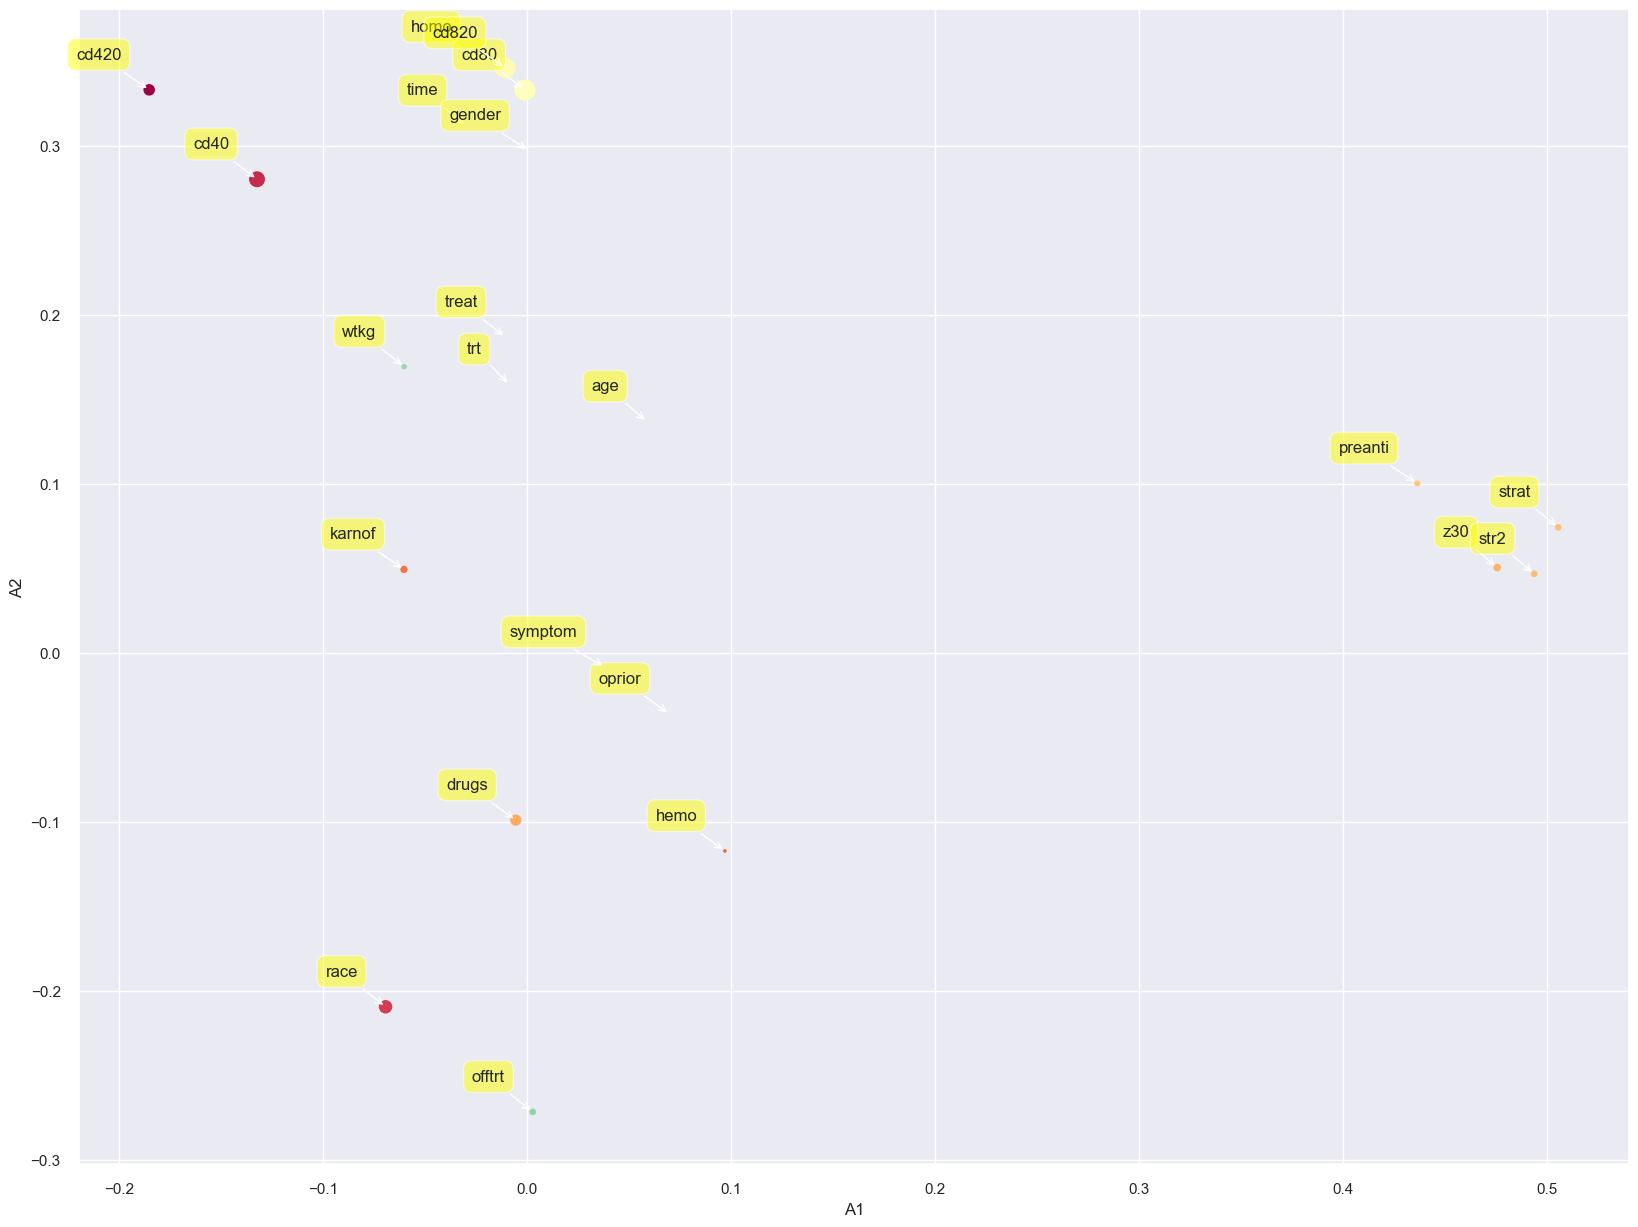

In [118]:
plt.figure()
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('A1')
plt.ylabel('A2')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

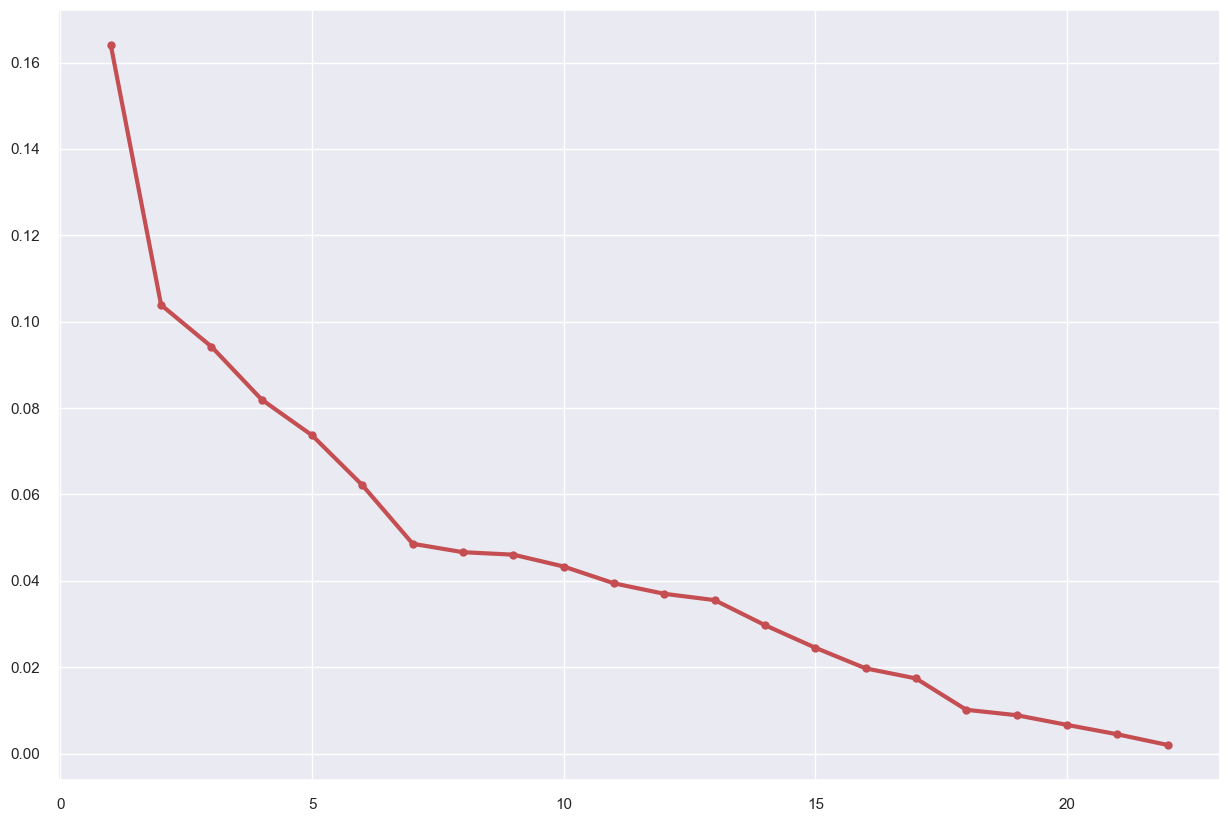

In [119]:
# eigenvalues
Lambda = pca.explained_variance_
x = np.arange(len(Lambda)) + 1
plt.figure(figsize=(15, 10))
plt.plot(x, Lambda/sum(Lambda), 'ro-', lw=3)
plt.show()

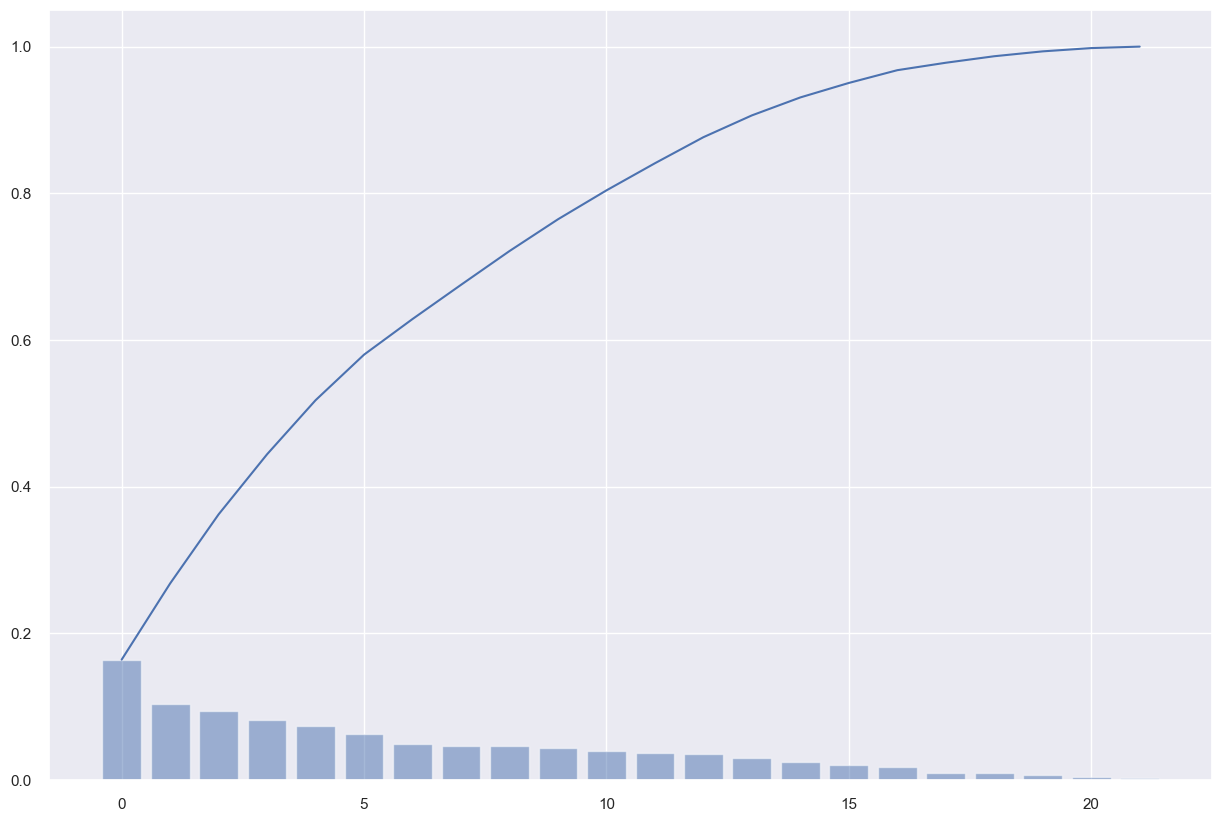

In [120]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.figure(figsize=(15, 10))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.show()

In [121]:
PC_variance = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}
PC_variance

{'0': 'PC 1 (16.4%)',
 '1': 'PC 2 (10.4%)',
 '2': 'PC 3 (9.4%)',
 '3': 'PC 4 (8.2%)',
 '4': 'PC 5 (7.4%)',
 '5': 'PC 6 (6.2%)',
 '6': 'PC 7 (4.9%)',
 '7': 'PC 8 (4.7%)',
 '8': 'PC 9 (4.6%)',
 '9': 'PC 10 (4.3%)',
 '10': 'PC 11 (3.9%)',
 '11': 'PC 12 (3.7%)',
 '12': 'PC 13 (3.6%)',
 '13': 'PC 14 (3.0%)',
 '14': 'PC 15 (2.5%)',
 '15': 'PC 16 (2.0%)',
 '16': 'PC 17 (1.7%)',
 '17': 'PC 18 (1.0%)',
 '18': 'PC 19 (0.9%)',
 '19': 'PC 20 (0.7%)',
 '20': 'PC 21 (0.4%)',
 '21': 'PC 22 (0.2%)'}

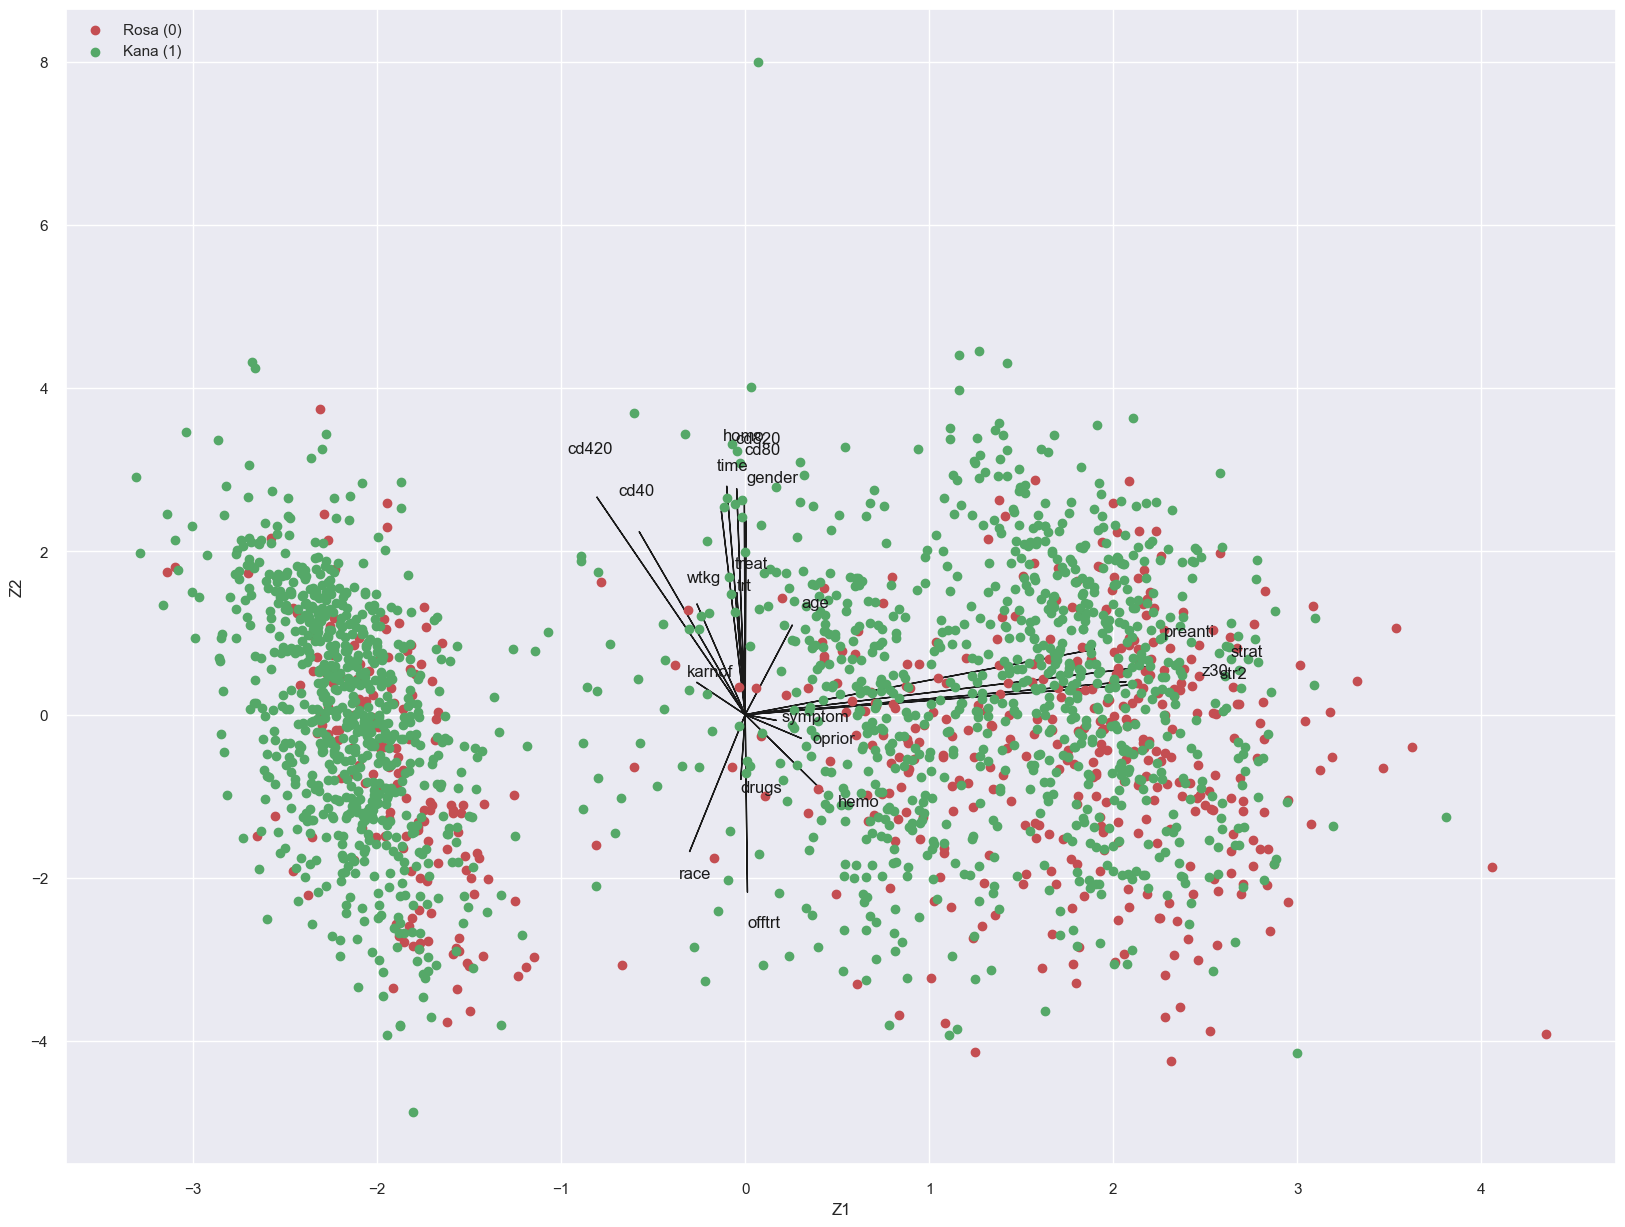

In [122]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure()
plt.xlabel('Z1')
plt.ylabel('Z2')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_infected,0], Z[idx_infected,1], c='r', label='Rosa (0)')
plt.scatter(Z[idx_not_infected,0], Z[idx_not_infected,1], c='g', label='Kana (1)')
plt.legend(loc='upper left')
#for i in range(len(Z1)):
# circles project documents (ie rows from csv) as points onto PC axes
  #plt.scatter(Z1[i], Z2[i], c='g', marker='o')
  #plt.text(Z1[i]*1.2, Z2[i]*1.2, observations[i], color='b')

In [123]:
# using the PCA modal
!pip3 install pca
from pca import pca

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [124]:
model = pca()

In [125]:
out = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [22] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.


[pca] >Compute explained variance.
[pca] >Number of components is [16] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [22] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[16]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


In [126]:
print(out['PC'])

           PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    -2.243114 -0.671746 -1.648886 -0.769374 -0.788861 -1.458038  0.156487   
1     2.648571 -1.459899 -1.459279 -1.765310  0.471095 -2.433171  0.925165   
2     1.845655  2.078218  0.959290  0.703084  3.300892 -0.617907 -0.663779   
3     2.318258  2.512782 -0.136955 -0.816937  0.139896 -0.352049  0.779727   
4     2.203288  1.043373  0.252520  1.295748 -2.587534 -0.813252 -0.345468   
...        ...       ...       ...       ...       ...       ...       ...   
2134  2.704766 -2.108485 -1.385420 -1.794503 -0.010554  3.538834  0.155096   
2135  1.625683 -1.842780  0.286592  3.060462 -0.062357  3.877494  0.105238   
2136  2.029388  1.260286 -1.062196 -0.016657  0.154413  0.732455  0.741407   
2137 -1.253416 -2.287394  0.425716  2.023459 -0.554959  4.328373  1.257716   
2138 -3.003842  2.307090 -3.755514 -0.042786 -1.827347  1.488620 -2.606443   

           PC8       PC9      PC10      PC11      PC12      PC1

In [127]:
print(out['topfeat'])

      PC  feature   loading  type
0    PC1    strat  0.505322  best
1    PC2     homo  0.349511  best
2    PC3     homo  0.424679  best
3    PC4      trt -0.505397  best
4    PC5    cd820  0.389815  best
5    PC6     hemo  0.598448  best
6    PC7   offtrt -0.431610  best
7    PC8   oprior  0.523714  best
8    PC9   oprior  0.536732  best
9   PC10  symptom -0.442677  best
10  PC11   karnof  0.629060  best
11  PC12     wtkg  0.540747  best
12  PC13    drugs -0.586272  best
13  PC14     race -0.543013  best
14  PC15   offtrt  0.550598  best
15  PC16    cd420  0.499242  best
16  PC16     time -0.489661  weak
17  PC13      age  0.493734  weak
18   PC1      z30  0.475377  weak
19   PC1  preanti  0.436245  weak
20  PC14   gender -0.439439  weak
21   PC1     str2  0.493534  weak
22   PC4    treat -0.497122  weak
23   PC7     cd40 -0.397381  weak
24   PC4     cd80  0.403460  weak


(<Figure size 1500x1000 with 1 Axes>,
 <Axes: title={'center': 'Cumulative explained variance\n 16 Principal Components explain [96.78%] of the variance.'}, xlabel='Principle Component', ylabel='Percentage explained variance'>)

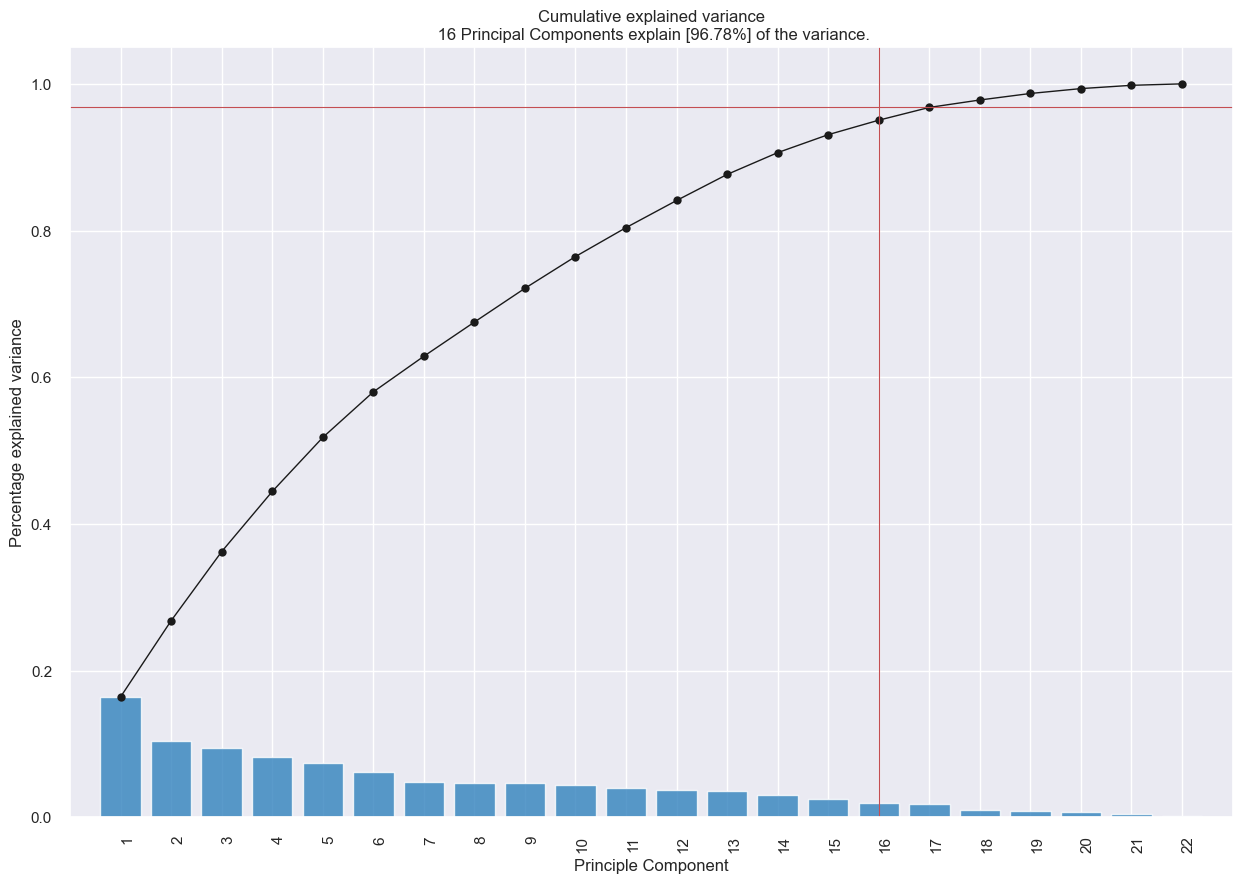

In [128]:
model.plot()

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


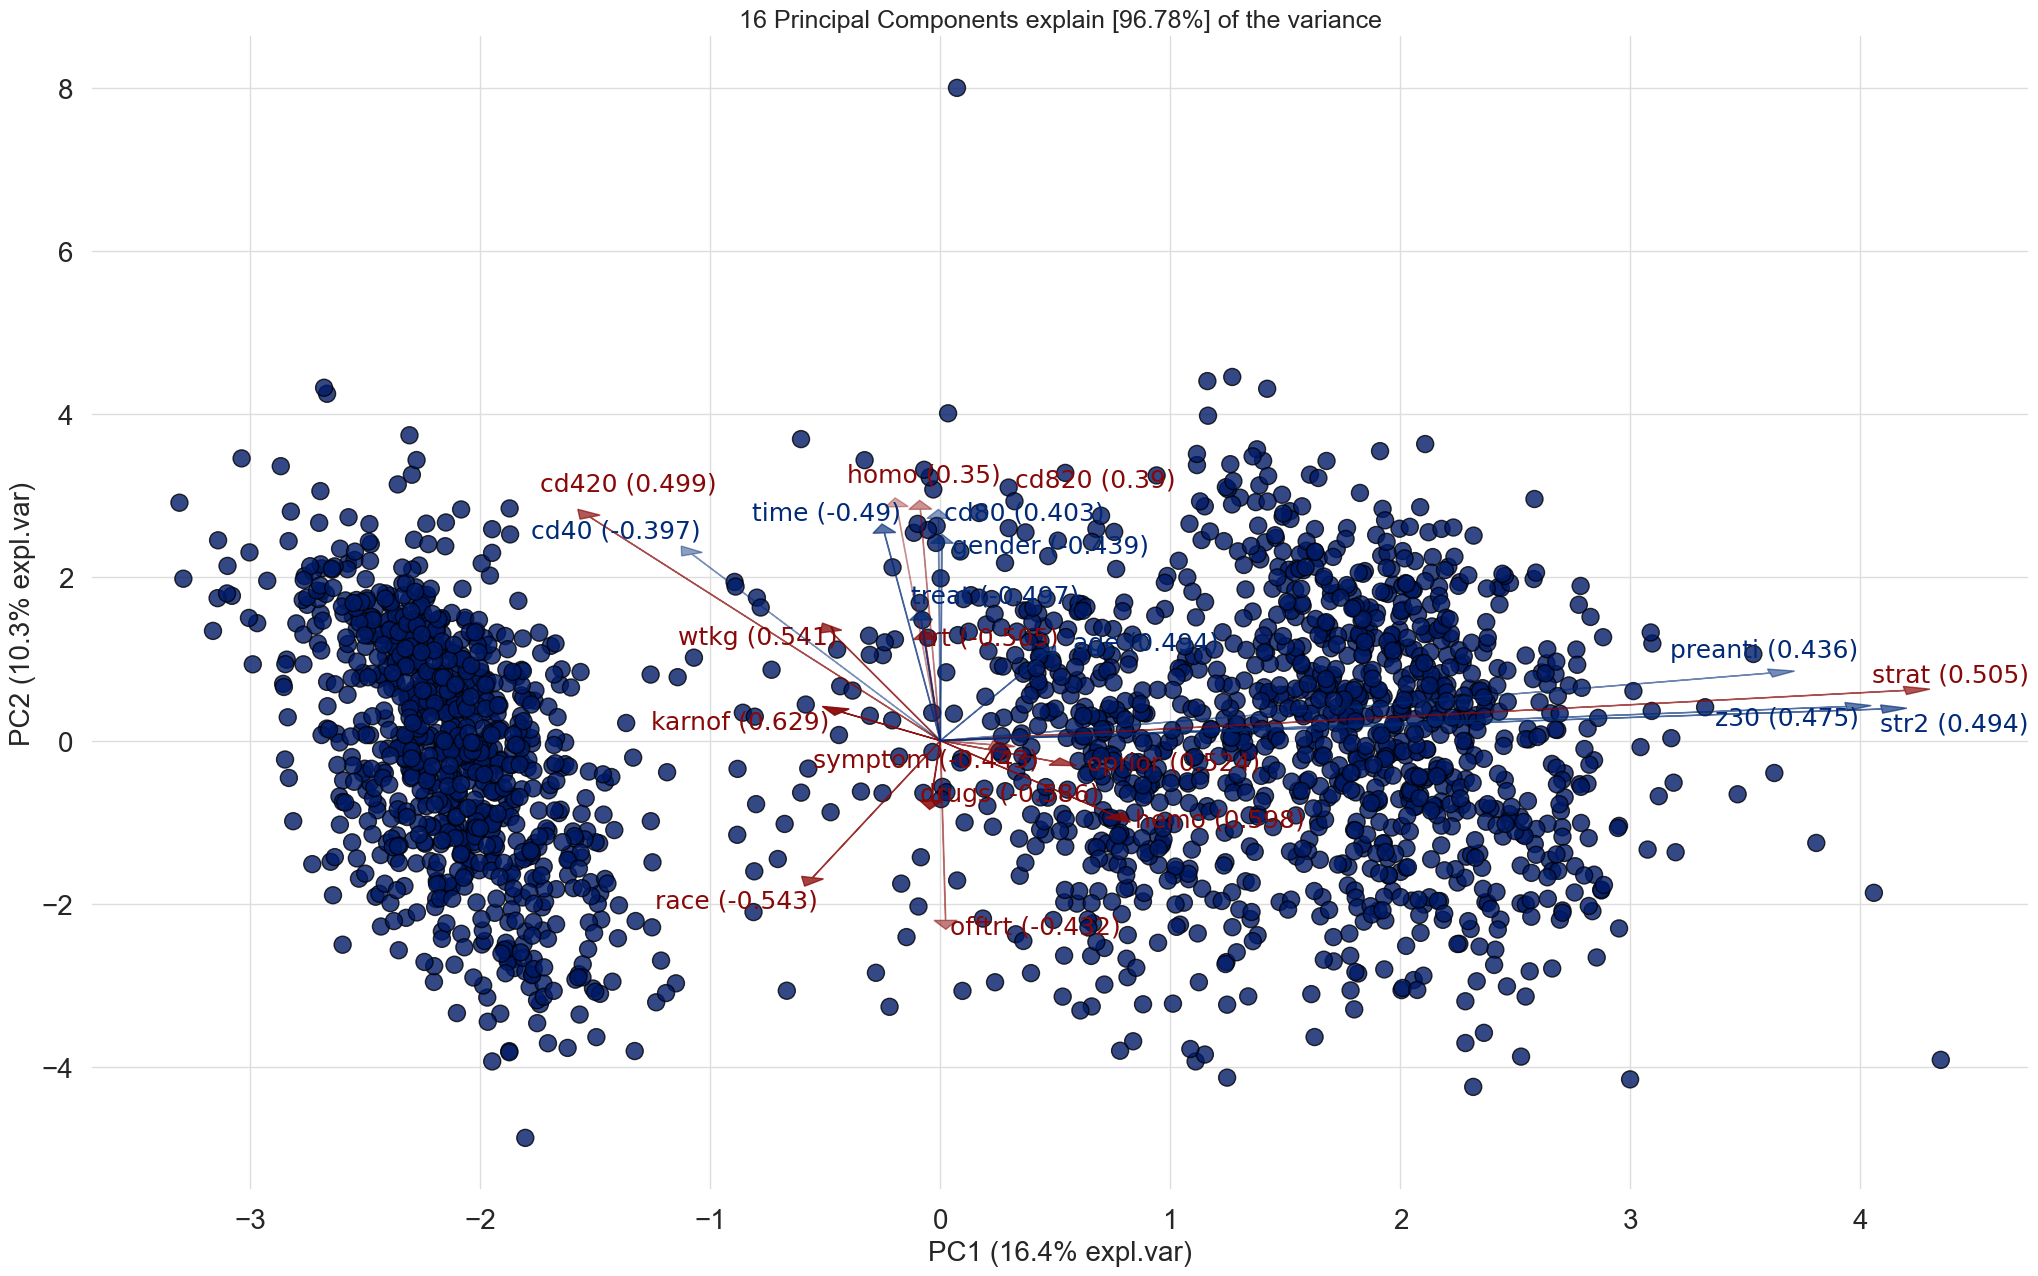

In [129]:
ax = model.biplot(label=False, legend=False)

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '16 Principal Components explain [96.78%] of the variance'}, xlabel='PC1 (16.4% expl.var)', ylabel='PC2 (10.3% expl.var)'>)

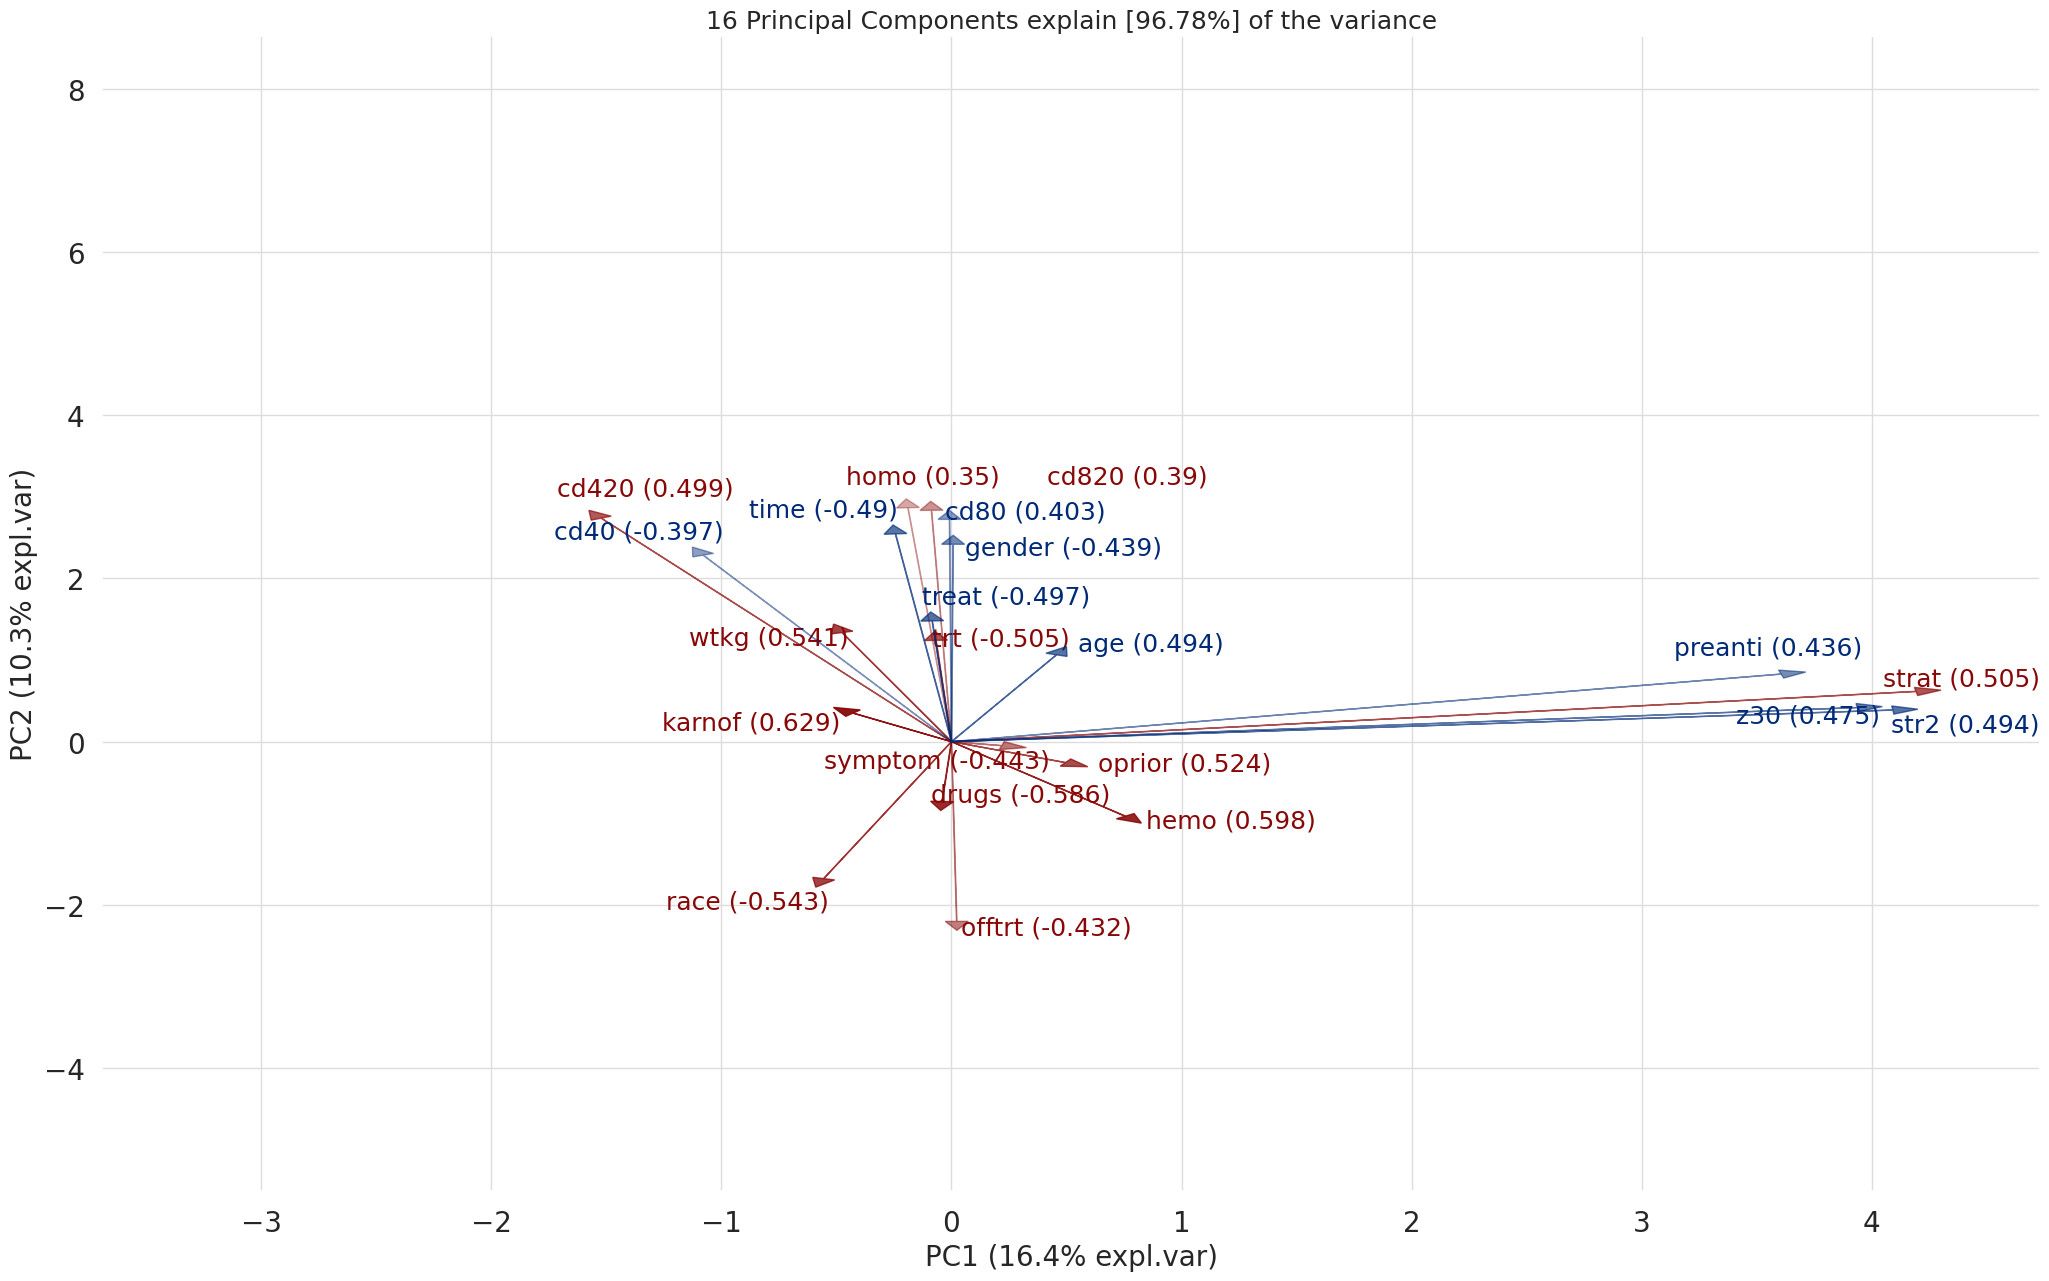

In [130]:
model.biplot(cmap=None, label=False, legend=False)

[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


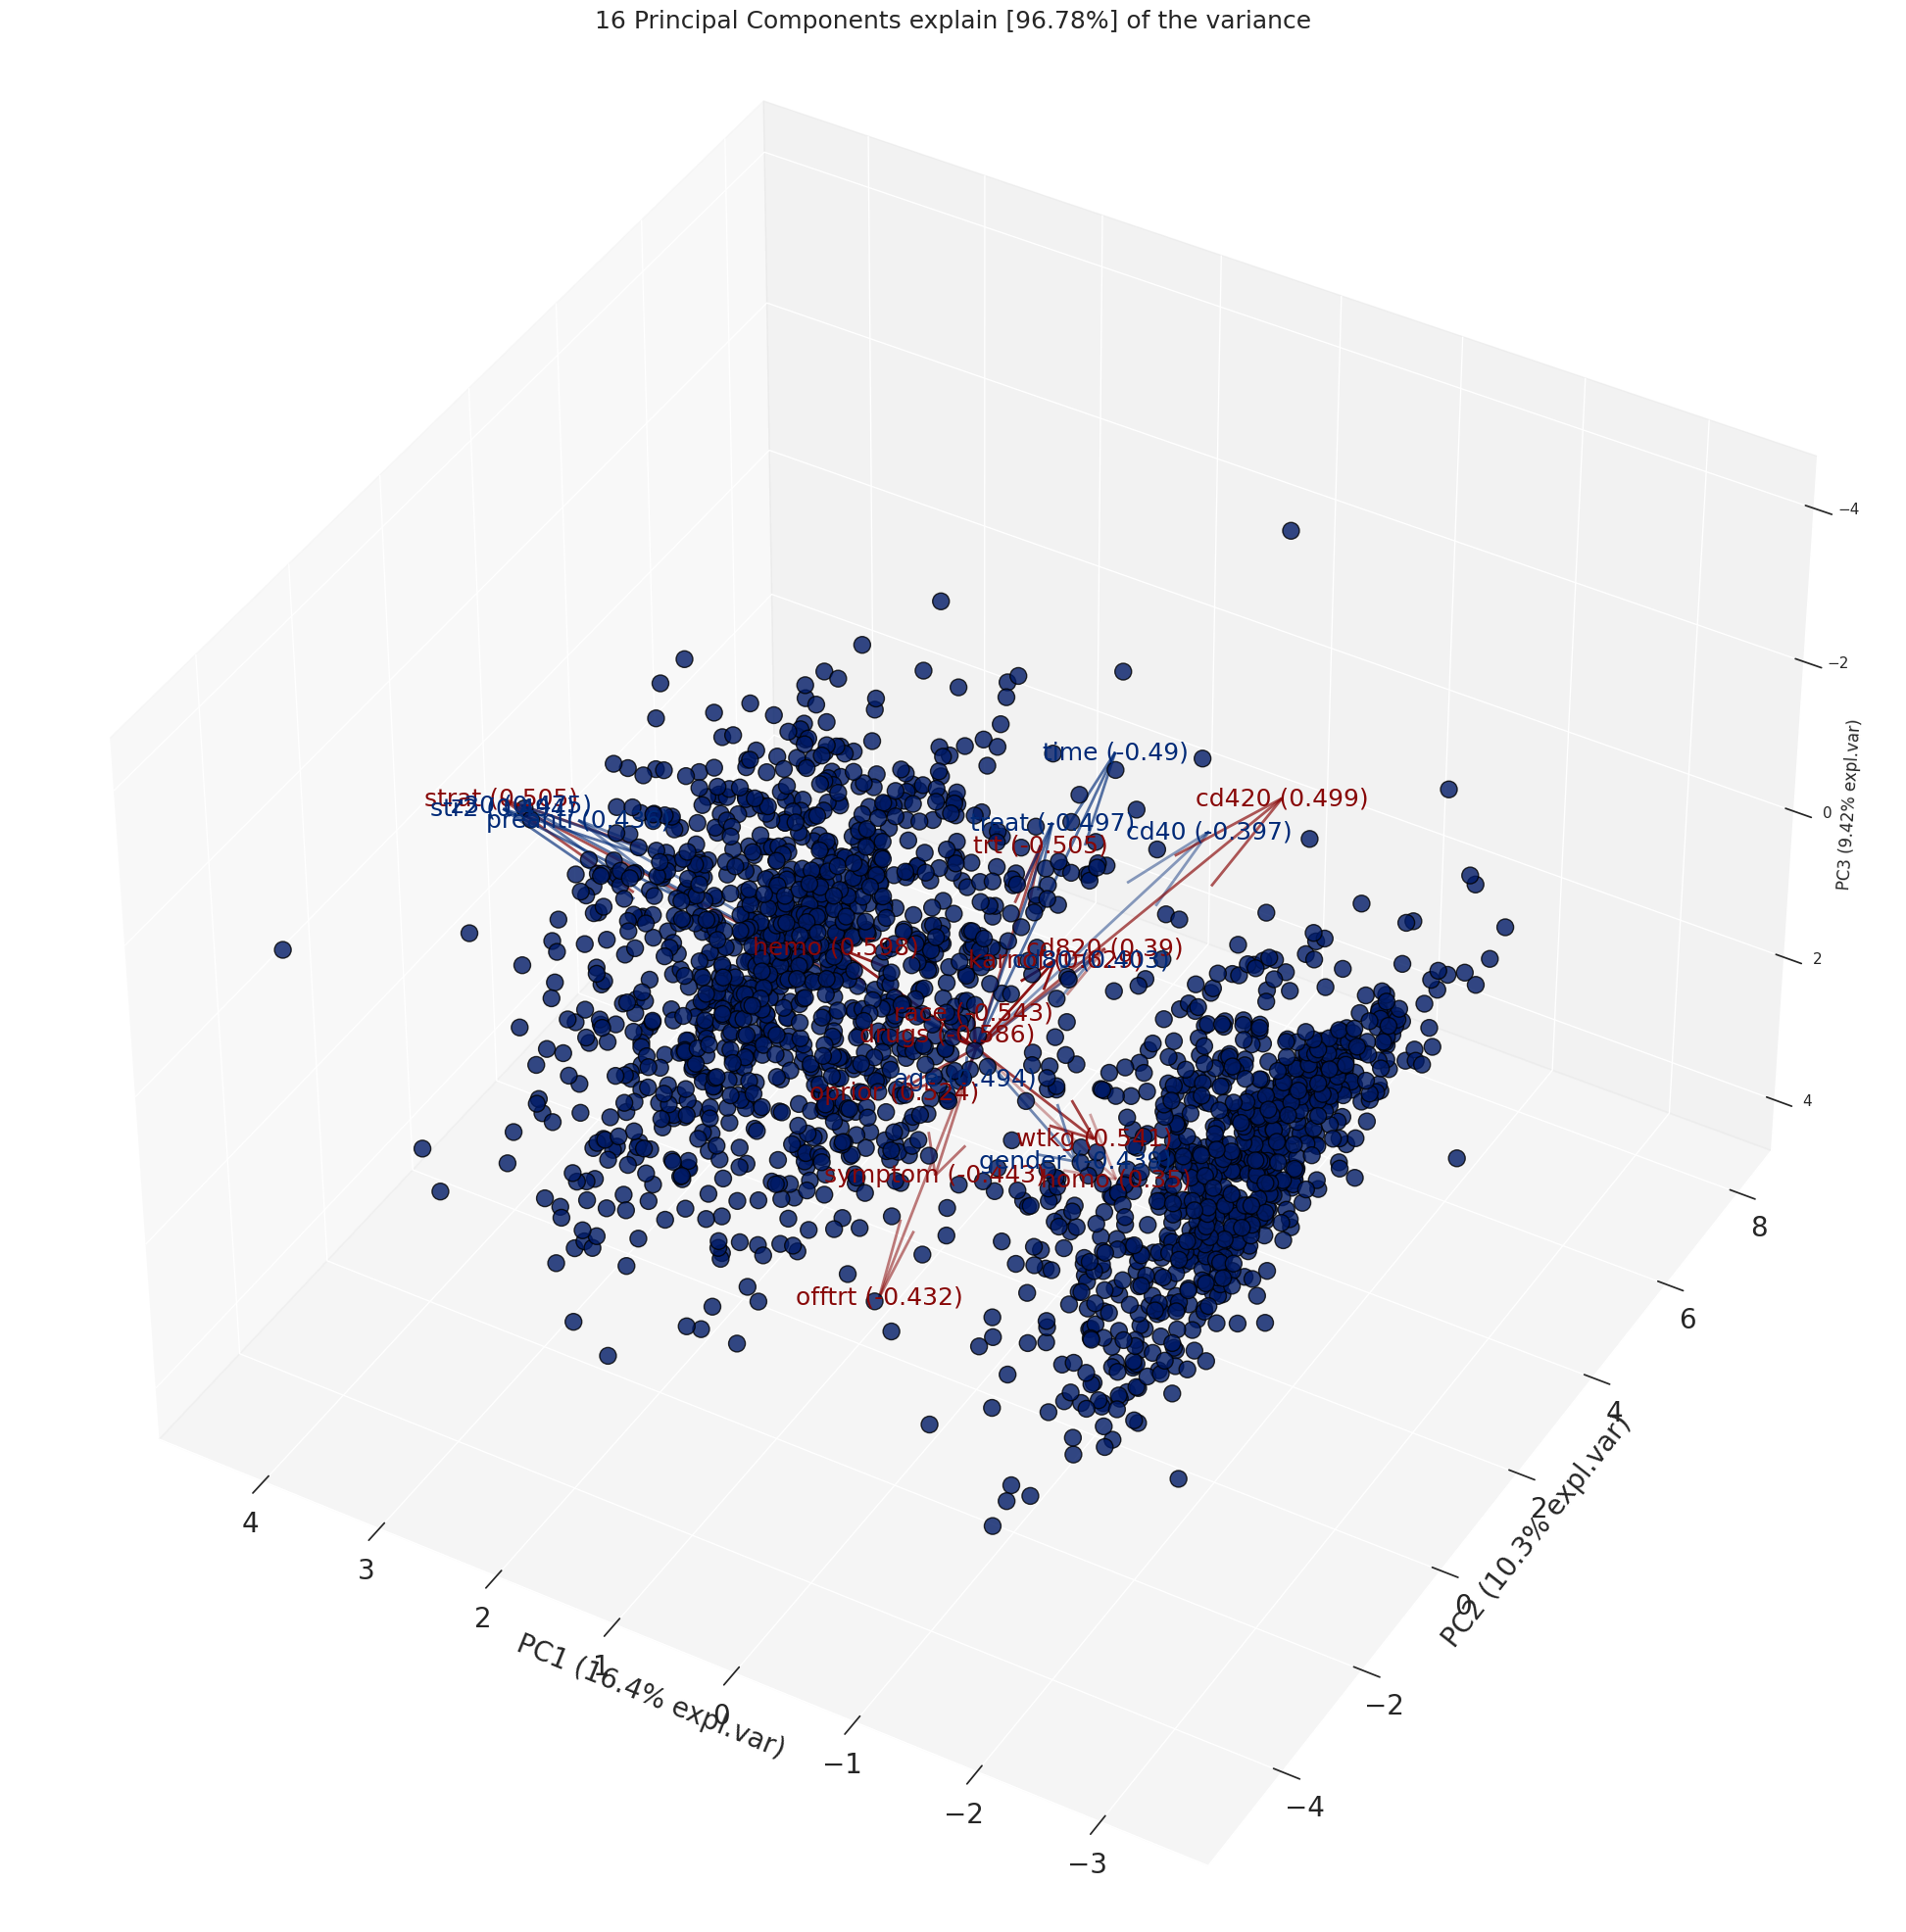

In [131]:
ax = model.biplot3d(legend=False)

In [132]:
# Eigenvectors
A = out['loadings'].T
print(A)

              PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
time    -0.029816  0.311866 -0.295836 -0.084887 -0.262144 -0.170868  0.228975   
trt     -0.008600  0.158735 -0.228938 -0.505397  0.380464  0.081339  0.012122   
age      0.058706  0.136832  0.173675 -0.035640  0.051060 -0.487395  0.108547   
wtkg    -0.060209  0.169211  0.218760  0.017068 -0.038486 -0.021936  0.056178   
hemo     0.096965 -0.117236 -0.174271  0.005128 -0.110805  0.598448 -0.025094   
homo    -0.023084  0.349511  0.424679 -0.197887 -0.114244 -0.073721 -0.046403   
drugs   -0.005512 -0.098992 -0.085511  0.099614  0.255212 -0.336805 -0.254367   
karnof  -0.060287  0.049280 -0.145654  0.037027 -0.201615  0.225516  0.214686   
oprior   0.069661 -0.036058  0.093601 -0.035715 -0.036674 -0.009734  0.408205   
z30      0.475377  0.050435 -0.075342  0.041213  0.003218 -0.035999 -0.092597   
preanti  0.436245  0.100171 -0.044257  0.021815 -0.042817 -0.009390 -0.072136   
race    -0.069327 -0.209417 

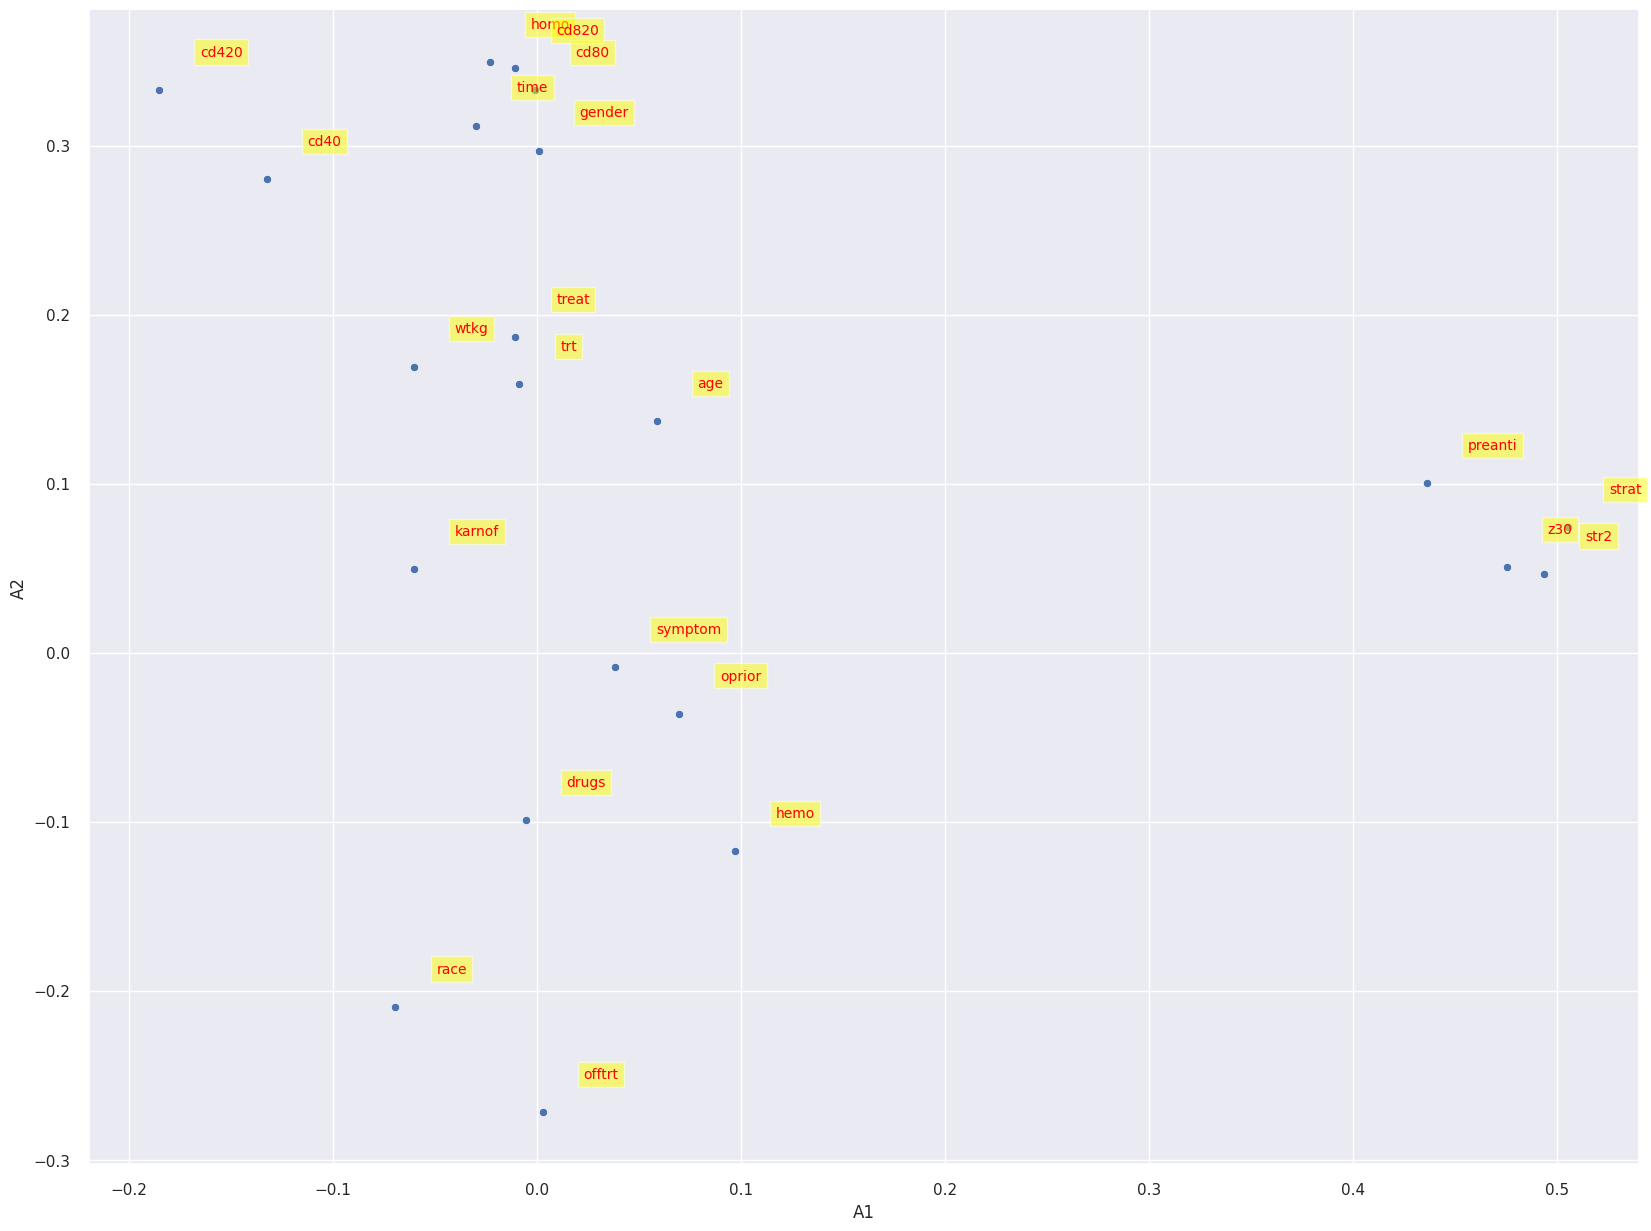

In [133]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('A1')
plt.ylabel('A2')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

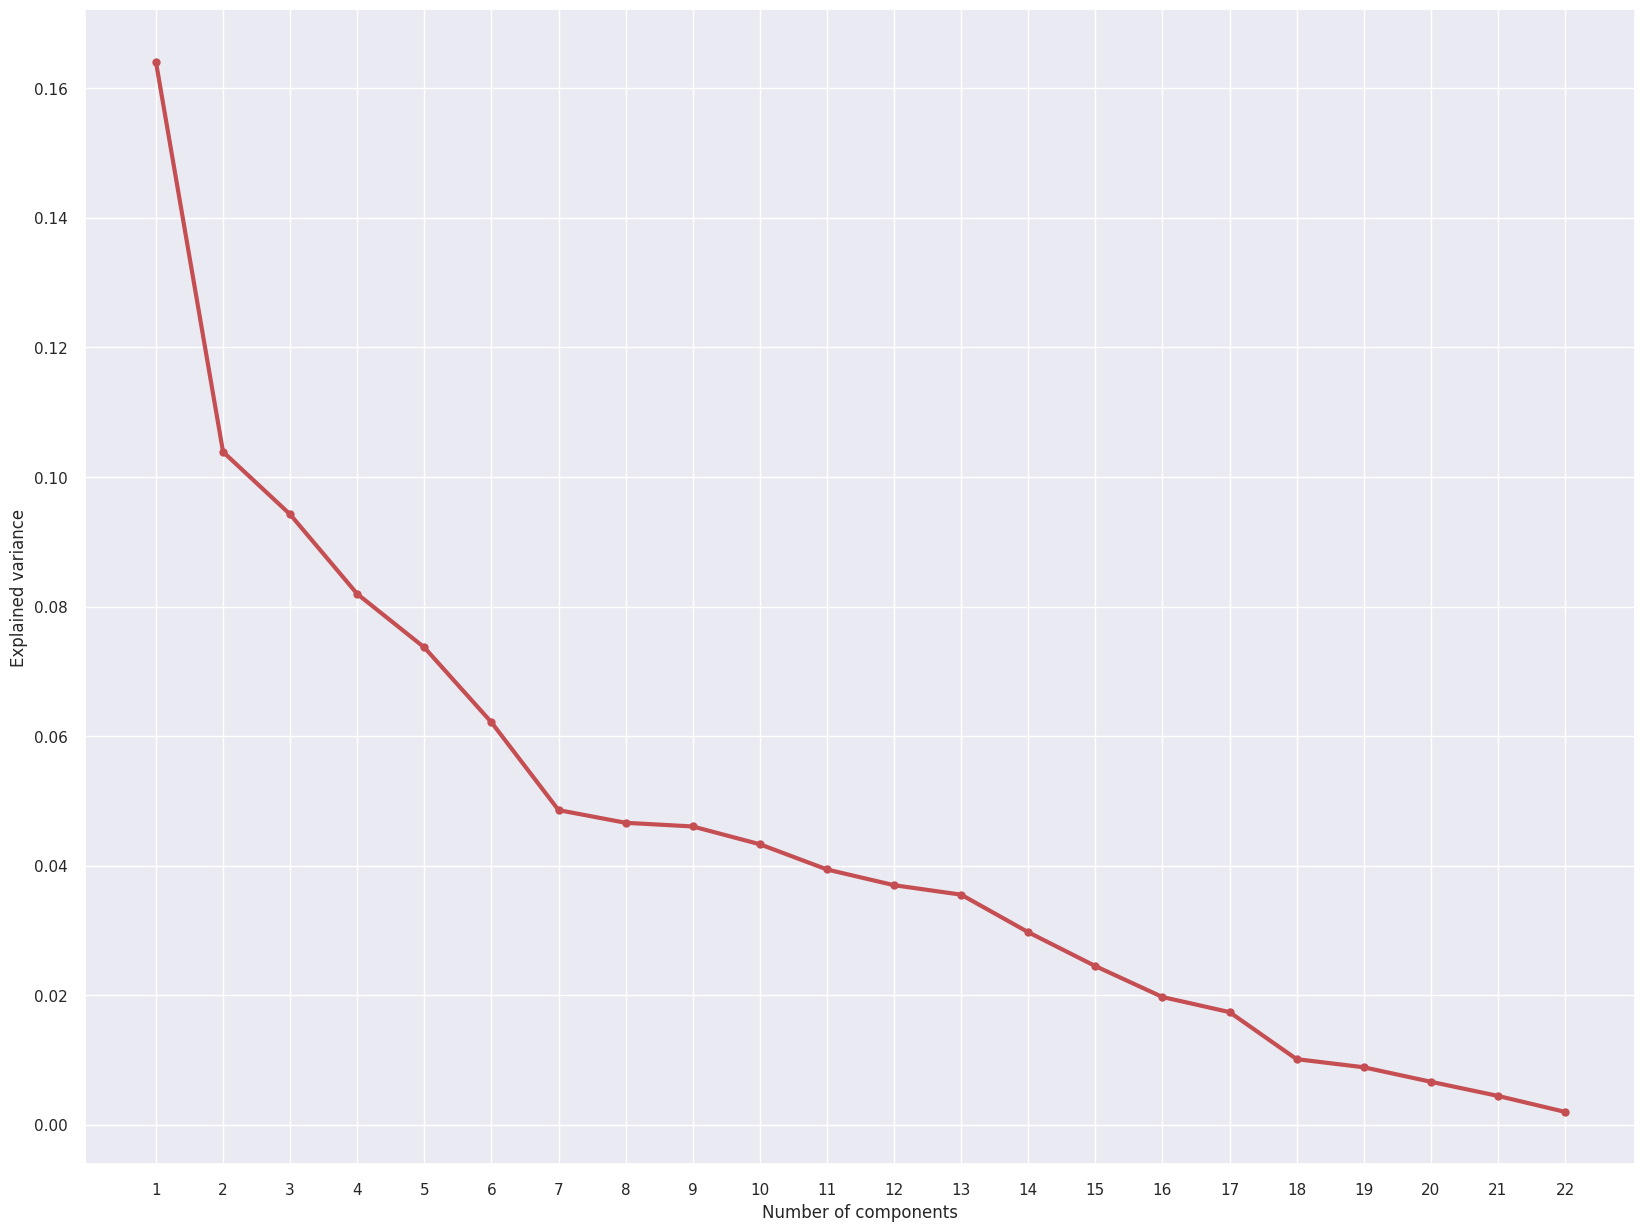

In [134]:
# scree plot
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

In [135]:
!pip3 install pycaret

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [136]:
data = df.sample(frac=0.9, random_state=786)
print(data.head())
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

      time  trt  age      wtkg  hemo  homo  drugs  karnof  oprior  z30  ...  \
461   1125    1   30  70.76160     0     1      0     100       0    1  ...   
607    392    2   35  73.90000     0     1      0     100       0    1  ...   
1649   982    3   35  67.94928     0     0      0      80       0    1  ...   
385   1121    3   33  86.18400     0     1      0      90       0    0  ...   
342    947    0   37  76.90000     0     1      0     100       0    1  ...   

      str2  strat  symptom  treat  offtrt  cd40  cd420  cd80  cd820  infected  
461      1      3        1      1       0   284    328  1287    751         0  
607      1      3        0      1       0   431    274  1466   1248         1  
1649     1      2        0      1       1   415    397   943   1228         0  
385      0      1        0      1       0   395    434  1133   1226         0  
342      1      3        0      0       0   743    561  1412    748         0  

[5 rows x 23 columns]
Data for Modeling: (19

In [137]:
from pycaret.classification import *
clf = setup(data=data, target='infected', train_size=0.7, session_id=123)

In [138]:
best_model = compare_models() 

In [139]:
best_model

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [140]:
# taking rf, gbc, ada and et models
rf = create_model('rf')
gbc = create_model('gbc')
ada = create_model('ada')
et = create_model('et')

In [141]:
rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

In [142]:
gbc

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [143]:
ada

AdaBoostClassifier(algorithm='SAMME.R', estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=123)

In [144]:
et

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

Tuning the models

In [145]:
tuned_rf = tune_model(rf)
evaluate_model(tuned_rf)

Initiated  . . . . . . . . . . . . . . . . . .              13:29:48
Status     . . . . . . . . . . . . . . . . . .  Loading Dependencies
Estimator  . . . . . . . . . . . . . . . . . .     Compiling Library

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [146]:
tuned_rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

In [147]:
tuned_gbc = tune_model(gbc)
tuned_gbc
evaluate_model(tuned_gbc)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [148]:
tuned_ada = tune_model(ada)
tuned_ada
evaluate_model(tuned_ada)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [149]:
tuned_et = tune_model(et)
tuned_et
evaluate_model(tuned_et)

Initiated  . . . . . . . . . . . . . . . . . .                13:30:52
Status     . . . . . . . . . . . . . . . . . .    Loading Dependencies
Estimator  . . . . . . . . . . . . . . . . . .  Extra Trees Classifier

Fitting 10 folds for each of 10 candidates, totalling 100 fits


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Evaluate Decision Tree Model

In [150]:
tuned_best_model = tune_model(best_model)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [151]:
tuned_best_model

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.15, loss='log_loss', max_depth=7,
                           max_features=1.0, max_leaf_nodes=None,
                           min_impurity_decrease=0.02, min_samples_leaf=5,
                           min_samples_split=5, min_weight_fraction_leaf=0.0,
                           n_estimators=230, n_iter_no_change=None,
                           random_state=123, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [152]:
evaluate_model(tuned_best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# Classification + PCA

In [153]:
clf_pca = setup(data=df, target='infected', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 16)


## show the best model and their statistics

In [154]:
best_model_pca = compare_models()

In [155]:
best_model_pca

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [156]:
tuned_best_model_pca = tune_model(best_model_pca)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [157]:
tuned_best_model_pca

LGBMClassifier(bagging_fraction=0.7, bagging_freq=6, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=66, min_child_weight=0.001, min_split_gain=0.4,
               n_estimators=90, n_jobs=-1, num_leaves=90, objective=None,
               random_state=123, reg_alpha=0.0005, reg_lambda=0.1,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [158]:
evaluate_model(tuned_best_model_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# Explainable AI with Shapley values

In [159]:
!pip3 install pycaret[full]
!pip3 install "pycaret[full]"

zsh:1: no matches found: pycaret[full]
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [160]:
import shap

In [161]:
rf_lightgbm = create_model('lightgbm')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [162]:
tuned_lightgbm_pca = tune_model(rf_lightgbm)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [163]:
interpret_model(tuned_lightgbm_pca, plot='summary')

ModuleNotFoundError: 
'shap' is a soft dependency and not included in the pycaret installation. Please run: `pip install shap` to install.
Alternately, you can install this by running `pip install pycaret[analysis]`